# Model and Metadata Analysis

In [1]:
import pandas as pd
import numpy as np 
import re
import os
import sys

sys.path.append("..")
DATA_DIR = "~/Desktop/code/data/"

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from matplotlib_venn import venn2
import seaborn as sns

ml_input = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)
bins = ml_input["source"].str.contains("KBase")

# Metabolic Features

## EC Comparison

### Venn Diagram 

In [2]:
db = ml_input[~bins]
mag = ml_input[bins]

db_ec = db["ec"].to_list()
mag_ec = mag["ec"].to_list()

ec_mask = mag["ec"].isin(db_ec)
overlap = mag[ec_mask]
unique = mag[~ec_mask]

overlap_list = overlap["ec"].to_list()
ovset = set(overlap_list)

unique_list = unique["ec"].to_list()
unset = set(unique_list)

print(len(ovset), "overlapping EC's,", len(unset), "unique")

1518 overlapping EC's, 305 unique


3875 training ECs, 1823 test ECs


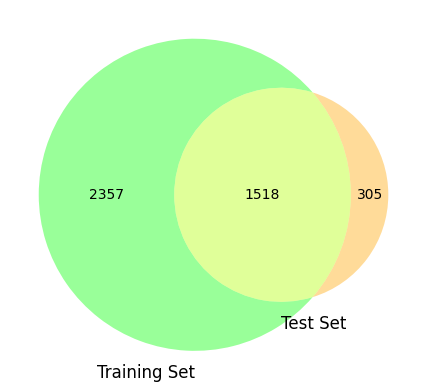

In [3]:
venn2(subsets=[set(db_ec), set(mag_ec)],
    set_labels=["Training Set", "Test Set"],
    set_colors=["lime", "orange"]
)

print(len(set(db_ec)), "training ECs,", len(set(mag_ec)), "test ECs")

### Bar graph (305 unique)

In [4]:
# 305 unique EC numbers

uec = unique.drop(['media_id', 'species', 'source'], axis=1)

print(len(unset), "unique ECs to the Fenix21 test set")
print(unset)

# Fenix21 counts for the 305 unique EC numbers

enzyme_df = uec.value_counts("ec").reset_index().copy()
enzyme_df['Group'] = enzyme_df['ec'].apply(lambda x: x.strip().split('.')[0])
grouped_df = enzyme_df.groupby('Group')['count'].sum().reset_index()
grouped_df.columns = ['Group','Total Count']
ec_class = ['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases']
grouped_df['Class'] = ec_class
taxa_enzyme_counts_1 = grouped_df[['Group','Class','Total Count']]

print("Fenix21 Counts:")
print(taxa_enzyme_counts_1)

# Distribution between classes of each of the unique EC numbers

uec_s = uec.drop("taxon_id", axis=1)
uec_s = uec_s.drop_duplicates()
enzyme_df = uec_s.value_counts("ec").reset_index().copy()
enzyme_df['Group'] = enzyme_df['ec'].apply(lambda x: x.strip().split('.')[0])
grouped_df = enzyme_df.groupby('Group')['count'].sum().reset_index()
grouped_df.columns = ['Group','Total Count']
ec_class = ['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases']
grouped_df['Class'] = ec_class
taxa_enzyme_counts_2 = grouped_df[['Group','Class','Total Count']]

print('Class Distributions:')
print(taxa_enzyme_counts_2)

# Create normalized abundances

df1 = taxa_enzyme_counts_1.copy()
sum1 = df1["Total Count"].sum(axis=0)
df1["Ratio"] = df1["Total Count"].div(sum1)

df2 = taxa_enzyme_counts_2.copy()
sum2 = df2["Total Count"].sum(axis=0)
df2["Ratio"] = df2["Total Count"].div(sum2)

305 unique ECs to the Fenix21 test set
{'1.1.1.294', '3.1.1.110', '1.10.3.17', '1.17.1.1', '5.1.99.3', '4.2.1.56', '6.1.1.13', '7.2.4.5', '1.13.11.41', '1.5.99.6', '1.7.1.15', '1.2.3.15', '2.4.1.255', '1.6.99.3', '3.1.22.4', '4.99.1.1', '1.14.99.44', '2.1.1.104', '2.1.3.1', '1.3.99.32', '3.7.1.5', '2.7.6.2', '3.5.3.26', '1.5.1.33', '1.3.7.14', '2.3.1.78', '2.1.1.152', '1.17.5.1', '1.13.11.18', '1.1.1.264', '2.5.1.56', '1.14.13.149', '2.1.1.95', '1.14.19.1', '6.6.1.2', '1.8.98.2', '2.4.1.49', '2.7.1.200', '1.3.1.72', '1.2.1.54', '2.7.1.89', '1.8.5.5', '3.1.4.54', '1.6.1.2', '1.1.1.350', '4.1.2.28', '4.99.1.10', '2.4.1.60', '6.3.5.6', '2.4.1.57', '5.2.1.12', '3.5.4.22', '1.14.19.21', '3.1.6.14', '4.2.1.165', '2.7.1.230', '2.1.1.332', '2.8.3.12', '1.21.1.1', '1.3.8.4', '1.3.1.34', '2.4.1.242', '2.5.1.62', '2.4.2.37', '3.2.2.16', '1.5.8.1', '2.4.2.40', '2.8.2.20', '2.1.1.130', '1.8.4.14', '2.7.1.83', '1.3.1.2', '5.6.1.9', '4.3.1.29', '7.2.4.8', '2.1.1.260', '1.8.99.5', '2.1.1.342', '1.3.1.

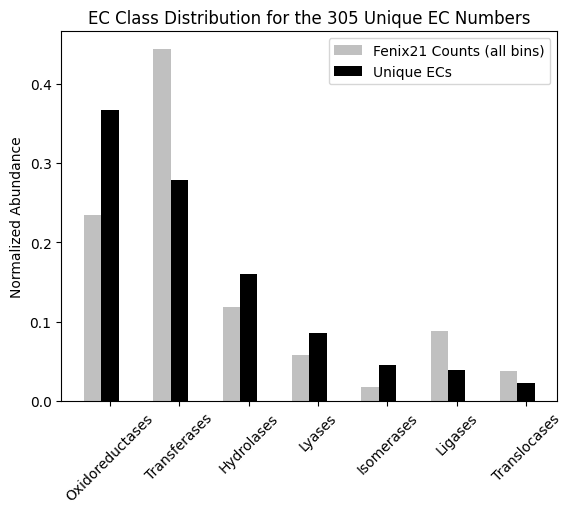

In [5]:
N = 7
ind = np.arange(N)  
width = 0.25
  
xvals = df1['Ratio']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = df2['Ratio']
bar2 = plt.bar(ind+width, yvals, width, color='black') 
  
plt.xticks(ind+width,['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases'],rotation=45) 
plt.ylabel("Normalized Abundance") 
plt.title("EC Class Distribution for the 305 Unique EC Numbers") 
plt.legend((bar1, bar2), ('Fenix21 Counts (all bins)', 'Unique ECs')) 

plt.gca().set_facecolor('white') 

plt.show() 

### Bar graph (all)

In [6]:
tec = pd.read_csv(os.path.join(DATA_DIR, 'taxa2ec-final.csv'), low_memory=False)

# Summing the abundance of enzymes across our taxa related to different enzyme groups
enzyme_df = tec.value_counts("ec").reset_index().copy() #ecs.value_counts originally
enzyme_df['Group'] = enzyme_df['ec'].apply(lambda x: x.strip().split('.')[0])
grouped_df = enzyme_df.groupby('Group')['count'].sum().reset_index()
grouped_df.columns = ['Group','Total Count']
# Adding information on the type of enzymes
ec_class = ['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases']
grouped_df['Class'] = ec_class

taxa_enzyme_counts = grouped_df[['Group','Class','Total Count']]
print(taxa_enzyme_counts)

bec = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)
bins = bec["source"].str.contains("KBase")
bec = bec[bins]

# Summing the abundance of enzymes across our taxa related to different enzyme groups
enzyme_df2 = bec.value_counts("ec").reset_index().copy() #ecs.value_counts originally
enzyme_df2['Group'] = enzyme_df2['ec'].apply(lambda x: x.strip().split('.')[0])
grouped_df2 = enzyme_df2.groupby('Group')['count'].sum().reset_index()
grouped_df2.columns = ['Group','Total Count']
# Adding information on the type of enzymes
ec_class = ['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases']
grouped_df2['Class'] = ec_class

bin_enzyme_counts = grouped_df2[['Group','Class','Total Count']]
print(bin_enzyme_counts)

  Group            Class  Total Count
0     1  Oxidoreductases       250577
1     2     Transferases       512583
2     3       Hydrolases       462458
3     4           Lyases       146148
4     5       Isomerases        99566
5     6          Ligases       141588
6     7     Translocases        48603
  Group            Class  Total Count
0     1  Oxidoreductases        19797
1     2     Transferases        43665
2     3       Hydrolases        18635
3     4           Lyases        11449
4     5       Isomerases         7521
5     6          Ligases         9864
6     7     Translocases         6191


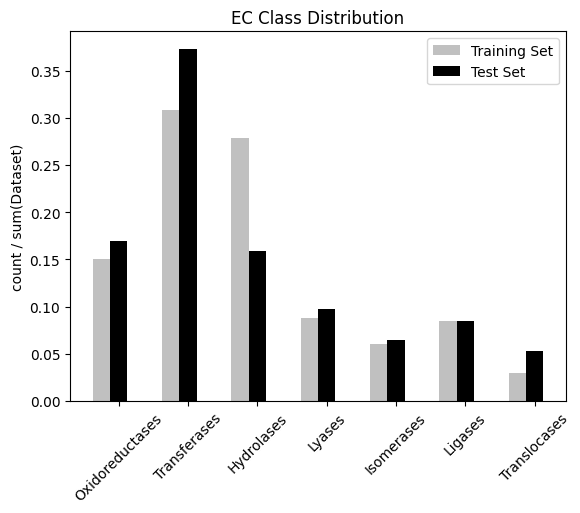

In [7]:
# Normalize counts
df1 = taxa_enzyme_counts.copy() 
sum1 = df1['Total Count'].sum(axis=0)
df1['Training_Proportion'] = df1['Total Count'].div(sum1)

df2 = bin_enzyme_counts.copy() 
sum2 = df2['Total Count'].sum(axis=0)
df2['Test_Proportion'] = df2['Total Count'].div(sum2)

N = 7
ind = np.arange(N)  
width = 0.25
  
xvals = df1['Training_Proportion']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = df2['Test_Proportion']
bar2 = plt.bar(ind+width, yvals, width, color='black') 
  
plt.xticks(ind+width,['Oxidoreductases','Transferases','Hydrolases','Lyases','Isomerases','Ligases','Translocases'],rotation=45) 
plt.ylabel("count / sum(Dataset)") 
plt.title("EC Class Distribution") 
plt.legend((bar1, bar2), ('Training Set', 'Test Set', 'Overlap')) 

plt.gca().set_facecolor('white') 

plt.show() 

## Cofactor Comparison

### Bar graph (all, grouped)

In [13]:
bin_ec = ml_input[bins]

ec_list = bin_ec["ec"].to_list()
ec_list = set(ec_list)

print(len(ec_list), "unique bin ECs")

# Retrieving bin cofactors
#import modules.cofactors as cofactors
#bin_cofactors = cofactors.ec2metals(ec_list)

#bin_cofactors.to_csv(os.path.join(DATA_DIR, "cofactors", "bins-cofactors-raw.csv"), index=False)
#bin_cofactors.head()

1823 unique bin ECs


In [14]:
# Format ec2metals output
bin_cofactors = pd.read_csv((os.path.join(DATA_DIR, "cofactors", "bins-cofactors-raw.csv")))
cofactors = bin_cofactors.drop_duplicates().copy()
cofactors = cofactors.dropna(subset=['CofactorExtracted']).copy()

# List out all cofactors
CofactorFinal = cofactors.drop_duplicates(subset=['Query EC','CofactorFinal']).copy()
CofactorFinal.to_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins.csv"), index=False) #SAVE

# Group cofactors by EC
grouped_cofactors = CofactorFinal.groupby("Query EC", as_index=False)["CofactorFinal"].apply(lambda x: "[%s]" % ', '.join(x))
grouped_cofactors.to_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins-grouped.csv"), index=False) #SAVE

# TOGGLE filter:

#redox = grouped_cofactors["Query EC"].str.startswith("1.")
#grouped_cofactors = grouped_cofactors[redox]

print(len(CofactorFinal), "ECs with cofactors, approximately", len(grouped_cofactors), "of which are cambialistic")

grouped_cofactors.head()

1226 ECs with cofactors, approximately 707 of which are cambialistic


Query EC CofactorFinal
0    1.1.1.1      [Zn, Fe]
1  1.1.1.103          [Zn]
2  1.1.1.105          [Zn]
3  1.1.1.133          [Mg]
4   1.1.1.17          [Zn]

In [15]:
co = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins.csv"), low_memory=False)
ct = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-taxa.csv"), low_memory=False)

# TOGGLE filter:

#redox = co["Query EC"].str.startswith("1.")
#redox2 = ct["Query EC"].str.startswith("1.")
#co = co[redox]
#ct = ct[redox2]

#Create, merge, format counts 
coct = co["CofactorFinal"].value_counts().reset_index()
sum1 = coct["count"].sum(axis=0)
coct['ratio1'] = coct['count'].div(sum1)
coct = coct.rename(columns={"count": "count1"})

ctct = ct["CofactorFinal"].value_counts().reset_index()
sum2 = ctct["count"].sum(axis=0)
ctct['ratio2'] = ctct['count'].div(sum2)
ctct = ctct.rename(columns={"count": "count2"})

cf_df = pd.merge(left=coct, right=ctct, on="CofactorFinal", how="left")
cf_df = cf_df.fillna(0)

x = cf_df["count1"].sum(axis=0)
y = cf_df["count2"].sum(axis=0)
print(x, "annotated bin cofactors", y, "annotated database cofactors")

cf_df.to_csv("~/Desktop/cofactors.csv", index=False)
cf_df.head()

1226 annotated bin cofactors 3406 annotated database cofactors


CofactorFinal  count1    ratio1  count2    ratio2
0            Mg     305  0.248777     671  0.195228
1            Fe     214  0.174551     602  0.175153
2            Zn     157  0.128059     425  0.123654
3             S     127  0.103589     322  0.093686
4            Mn      93  0.075856     252  0.073320

In [16]:
#bin_cofactors = {
#    'Elemental': ["C", "Ca", "Cl", "Co", "Cu", "Fe", "K", "La", "Mg", "Mn", "Mo", "Na", "Ni", "O", "S", "V", "W", "Zn", "metal"],
#    'Organic': ["ATP", "C", "FAD", "FMN", "L-ascorbate", "NAD", "NADP", "NADPH", "S-adenosyl-L-methionine", 
#                "an oxidized flavin", "biotin", "corrinoid", "glutathione", "homocitryl", "prenyl-FMN",
#                "pyridoxal 5'-phosphate", "pyrroloquinoline quinone", "pyruvate", "thiamine diphosphate"],
#    'Other': ["Se-Mo-molybdoprterin cytosine dinucleotide", "a monovalent", "NH4"]
#}

relabeled_cofactors = cf_df.copy()
dictionary = {
    "ATP": "Org", 
    "FAD": "Org", 
    "L-ascorbate": "Org", 
    "NADPH": "Org", 
    "NADP": "Org", 
    "NAD": "Org", 
    "S-adenosyl-L-methionine": "Org", 
    "an oxidized flavin": "Org", 
    "biotin": "Org", 
    "corrinoid": "Org", 
    "glutathione": "Org", 
    "homocitryl": "Org", 
    "prenyl-FMN": "Org",
    "FMN": "Org", 
    "pyridoxal 5'-phosphate": "Org", 
    "pyrroloquinoline quinone": "Org", 
    "pyruvate": "Org", 
    "thiamine diphosphate": "Org",
    "Se-Mo-molybdopterin cytosine dinucleotide": "Org",
    "a monovalent": "UM",
    "metal": "UM"
}

for key in dictionary.keys():
    relabeled_cofactors["CofactorFinal"] = relabeled_cofactors["CofactorFinal"].str.replace(key, dictionary[key])

relabeled_cofactors = relabeled_cofactors.groupby(['CofactorFinal'])[['count1', 'ratio1', 'count2', 'ratio2']].sum().reset_index()
relabeled_cofactors = relabeled_cofactors.sort_values(['count1'], ascending=[False])
relabeled_cofactors.head()

CofactorFinal  count1    ratio1  count2    ratio2
8             Mg     305  0.248777     671  0.195228
5             Fe     214  0.174551     602  0.175153
20            Zn     157  0.128059     425  0.123654
16             S     127  0.103589     322  0.093686
15           Org     106  0.086460     436  0.126855

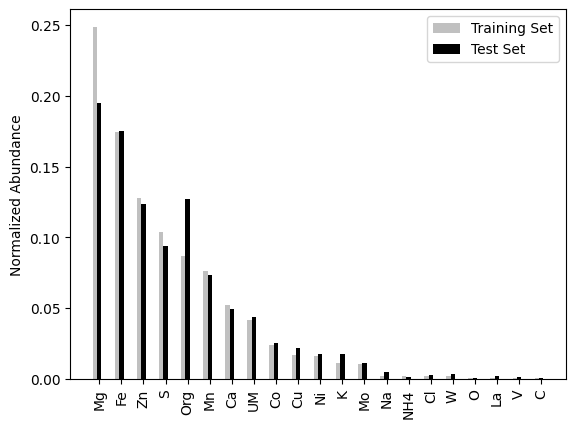

In [17]:
import numpy as np 
import matplotlib.pyplot as plt 

data = relabeled_cofactors # CHANGE with cf_df to see original cofactor labels (N = 40)
N = len(data)
ind = np.arange(N)  
width = 0.2
  
xvals = data['ratio1']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = data['ratio2']
bar2 = plt.bar(ind+width, yvals, width, color='black') 

plt.xticks(ind+width, data["CofactorFinal"], rotation=90) #
plt.ylabel("Normalized Abundance") # => len(set)=1
#plt.xlabel("Cofactor")
#plt.title("Cofactor distribution") 
plt.legend((bar1, bar2), ('Training Set', 'Test Set'))

plt.gca().set_facecolor('white') 

plt.show() 

NOTE: most "metal" annotations are vague "divalent metal cation", without a specific metals listed in UniProtKB

### Bar graph (all, tail)

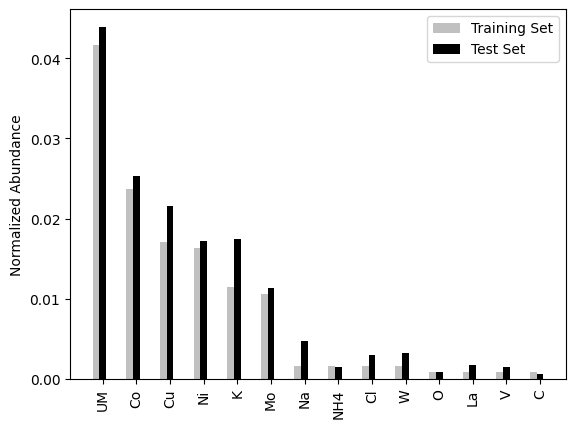

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 

n = 7 # number of highest abundance cofactors to omit
N = len(relabeled_cofactors)-n 
data = relabeled_cofactors.iloc[n:n+N]
ind = np.arange(N)  
width = 0.2
  
xvals = data['ratio1']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = data['ratio2']
bar2 = plt.bar(ind+width, yvals, width, color='black') 

plt.xticks(ind+width, data["CofactorFinal"], rotation=90) 
plt.ylabel("Normalized Abundance") 
#plt.title("Cofactor distribution (tail)") 
plt.legend((bar1, bar2), ('Training Set', 'Test Set'))

plt.gca().set_facecolor('white') 

plt.show() 

### Bar graph (metals only)

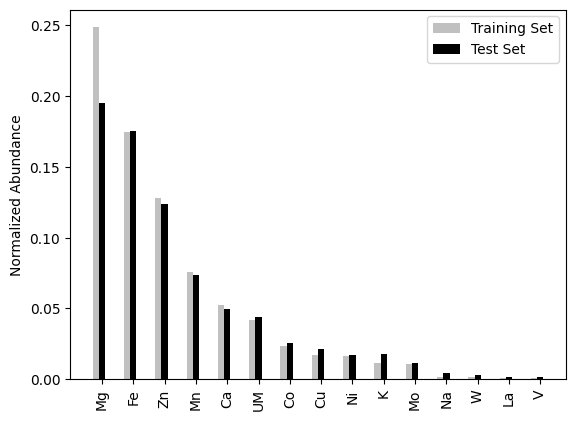

In [19]:
metals_df = relabeled_cofactors.copy()

# Subset with ONLY metal cofactors:
metals = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "metals-list.csv"))
metals_list = metals['Metals'].to_list()
mask = metals_df['CofactorFinal'].isin(metals_list)
metals_cf = metals_df[mask]

import numpy as np 
import matplotlib.pyplot as plt 

data = metals_cf
N = len(data)
ind = np.arange(N)  
width = 0.2
  
xvals = data['ratio1']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = data['ratio2']
bar2 = plt.bar(ind+width, yvals, width, color='black') 

plt.xticks(ind+width, data["CofactorFinal"], rotation=90) 
plt.ylabel("Normalized Abundance") 
#plt.title("Cofactor distribution (metals only)") 
plt.legend((bar1, bar2), ('Training Set', 'Test Set'))

plt.gca().set_facecolor('white') 

plt.show() 

### ECDF

In [24]:
metals_cf.head()

train_metals = metals_cf[["CofactorFinal", "count1", "ratio1"]].copy()
train_metals["Set"] = "Training"
train_metals = train_metals.rename(columns={"count1": "Count", "ratio1": "Ratio"})

test_metals = metals_cf[["CofactorFinal", "count2", "ratio2"]].copy()
test_metals["Set"] = "Test"
test_metals = test_metals.rename(columns={"count2": "Count", "ratio2": "Ratio"})

frames = train_metals, test_metals
ecdf = pd.concat(frames)
ecdf

CofactorFinal  Count     Ratio       Set
8             Mg    305  0.248777  Training
5             Fe    214  0.174551  Training
20            Zn    157  0.128059  Training
9             Mn     93  0.075856  Training
1             Ca     64  0.052202  Training
17            UM     51  0.041599  Training
3             Co     29  0.023654  Training
4             Cu     21  0.017129  Training
13            Ni     20  0.016313  Training
6              K     14  0.011419  Training
10            Mo     13  0.010604  Training
12            Na      2  0.001631  Training
19             W      2  0.001631  Training
7             La      1  0.000816  Training
18             V      1  0.000816  Training
8             Mg    671  0.195228      Test
5             Fe    602  0.175153      Test
20            Zn    425  0.123654      Test
9             Mn    252  0.073320      Test
1             Ca    170  0.049462      Test
17            UM    151  0.043934      Test
3             Co     87  0.025313      Test
4             Cu     74  0.021530      Test
13            Ni     59  0.017166      Test
6              K     60  0.017457      Test
10            Mo     39  0.011347      Test
12            Na     16  0.004655      Test
19             W     11  0.003200      Test
7             La      6  0.001746      Test
18             V      5  0.001455      Test

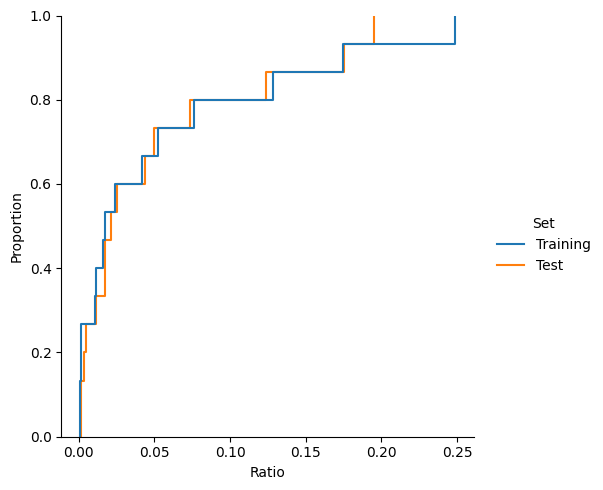

In [25]:
sns.displot(x='Ratio', hue='Set', data=ecdf, kind='ecdf')

### Heatmap 

In [15]:
cf = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-bins.csv"), low_memory=False)
cf = cf[["Query EC", "CofactorFinal"]]
cf = cf.rename(columns={"Query EC": "ec", "CofactorFinal": "cofactor"})

taxa = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)
bins = taxa["source"].str.contains("KBase")
taxa = taxa[bins]

binco = pd.merge(left=taxa, right=cf, on="ec", how="left")
binco = binco[["taxon_id", "ec", "cofactor"]]
binco = binco.rename(columns={"taxon_id": "bin_name"})

binco.to_csv(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv"), index=False)
binco.head()

bin_name         ec cofactor
0  KBase_derived_Bin.001.fastaBA_F_extracted_bins...  2.1.1.297      NaN
1  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   6.1.1.21      NaN
2  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33      NH4
3  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33       Mn
4  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33        K

In [16]:
data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))

data = data.dropna()
data_heatmap = data[["bin_name", "cofactor"]].drop_duplicates()
data_heatmap["count"] = 1
data_heatmap = data_heatmap.pivot(index="bin_name", columns="cofactor", values="count") #.pivot

# Can set a filter to only show specific bins

#(z, text_auto=True, aspect="auto")
fig = px.imshow(data_heatmap, aspect="auto") #
fig.update_coloraxes(showscale=False)
fig.update_layout(template='plotly_white')
#fig.update_yaxes(showticklabels=False)

In [17]:
#TODO: update axes to see individual bins

### Clustermap

In [18]:
import seaborn as sns
data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))

# RELABEL long ass name
#data['bin'] = data['bin_name'].str.extract(r'(Bin\.\d+\.[^_]+_[A-Z])')

data = data[["bin_name", "cofactor"]].drop_duplicates()
data["count"] = 1
data = pd.pivot_table(data, values='count', index='bin_name', columns='cofactor')
data = data.fillna(0)

data.head()
#data.to_csv("~/Desktop/data.csv", index=False)

cofactor                                            ATP    C   Ca   Cl   Co  \
bin_name                                                                      
KBase_derived_Bin.001.fastaBA_F_extracted_bins....  1.0  0.0  1.0  0.0  1.0   
KBase_derived_Bin.001.fastaBA_S_extracted_bins....  0.0  0.0  1.0  1.0  1.0   
KBase_derived_Bin.001.fastaCF_F_extracted_bins....  0.0  0.0  1.0  1.0  1.0   
KBase_derived_Bin.001.fastaCG_S_extracted_bins....  0.0  0.0  1.0  1.0  1.0   
KBase_derived_Bin.001.fastaFE_F_extracted_bins....  0.0  0.0  1.0  1.0  1.0   

cofactor                                             Cu  FAD  FMN   Fe    K  \
bin_name                                                                      
KBase_derived_Bin.001.fastaBA_F_extracted_bins....  1.0  1.0  1.0  1.0  1.0   
KBase_derived_Bin.001.fastaBA_S_extracted_bins....  1.0  1.0  1.0  1.0  1.0   
KBase_derived_Bin.001.fastaCF_F_extracted_bins....  1.0  1.0  1.0  1.0  1.0   
KBase_derived_Bin.001.fastaCG_S_extracted_bins....  1.0  1.0  1.0  1.0  1.0   
KBase_derived_Bin.001.fastaFE_F_extracted_bins....  1.0  1.0  1.0  1.0  1.0   

cofactor                                            ...  biotin  corrinoid  \
bin_name                                            ...                      
KBase_derived_Bin.001.fastaBA_F_extracted_bins....  ...     1.0        0.0   
KBase_derived_Bin.001.fastaBA_S_extracted_bins....  ...     1.0        0.0   
KBase_derived_Bin.001.fastaCF_F_extracted_bins....  ...     0.0        1.0   
KBase_derived_Bin.001.fastaCG_S_extracted_bins....  ...     1.0        0.0   
KBase_derived_Bin.001.fastaFE_F_extracted_bins....  ...     1.0        0.0   

cofactor                                            glutathione  homocitryl  \
bin_name                                                                      
KBase_derived_Bin.001.fastaBA_F_extracted_bins....          0.0         0.0   
KBase_derived_Bin.001.fastaBA_S_extracted_bins....          0.0         0.0   
KBase_derived_Bin.001.fastaCF_F_extracted_bins....          0.0         0.0   
KBase_derived_Bin.001.fastaCG_S_extracted_bins....          0.0         0.0   
KBase_derived_Bin.001.fastaFE_F_extracted_bins....          0.0         0.0   

cofactor                                            metal  prenyl-FMN  \
bin_name                                                                
KBase_derived_Bin.001.fastaBA_F_extracted_bins....    1.0         0.0   
KBase_derived_Bin.001.fastaBA_S_extracted_bins....    1.0         1.0   
KBase_derived_Bin.001.fastaCF_F_extracted_bins....    1.0         1.0   
KBase_derived_Bin.001.fastaCG_S_extracted_bins....    1.0         1.0   
KBase_derived_Bin.001.fastaFE_F_extracted_bins....    1.0         0.0   

cofactor                                            pyridoxal 5'-phosphate  \
bin_name                                                                     
KBase_derived_Bin.001.fastaBA_F_extracted_bins....                     1.0   
KBase_derived_Bin.001.fastaBA_S_extracted_bins....                     1.0   
KBase_derived_Bin.001.fastaCF_F_extracted_bins....                     1.0   
KBase_derived_Bin.001.fastaCG_S_extracted_bins....                     1.0   
KBase_derived_Bin.001.fastaFE_F_extracted_bins....                     1.0   

cofactor                                            pyrroloquinoline quinone  \
bin_name                                                                       
KBase_derived_Bin.001.fastaBA_F_extracted_bins....                       0.0   
KBase_derived_Bin.001.fastaBA_S_extracted_bins....                       0.0   
KBase_derived_Bin.001.fastaCF_F_extracted_bins....                       0.0   
KBase_derived_Bin.001.fastaCG_S_extracted_bins....                       0.0   
KBase_derived_Bin.001.fastaFE_F_extracted_bins....                       0.0   

cofactor                                            pyruvate  \
bin_name                                                       
KBase_derived_Bin.001.fastaBA_F_extracted_b

<bound method _AxesBase.set_axis_off of <Axes: >>

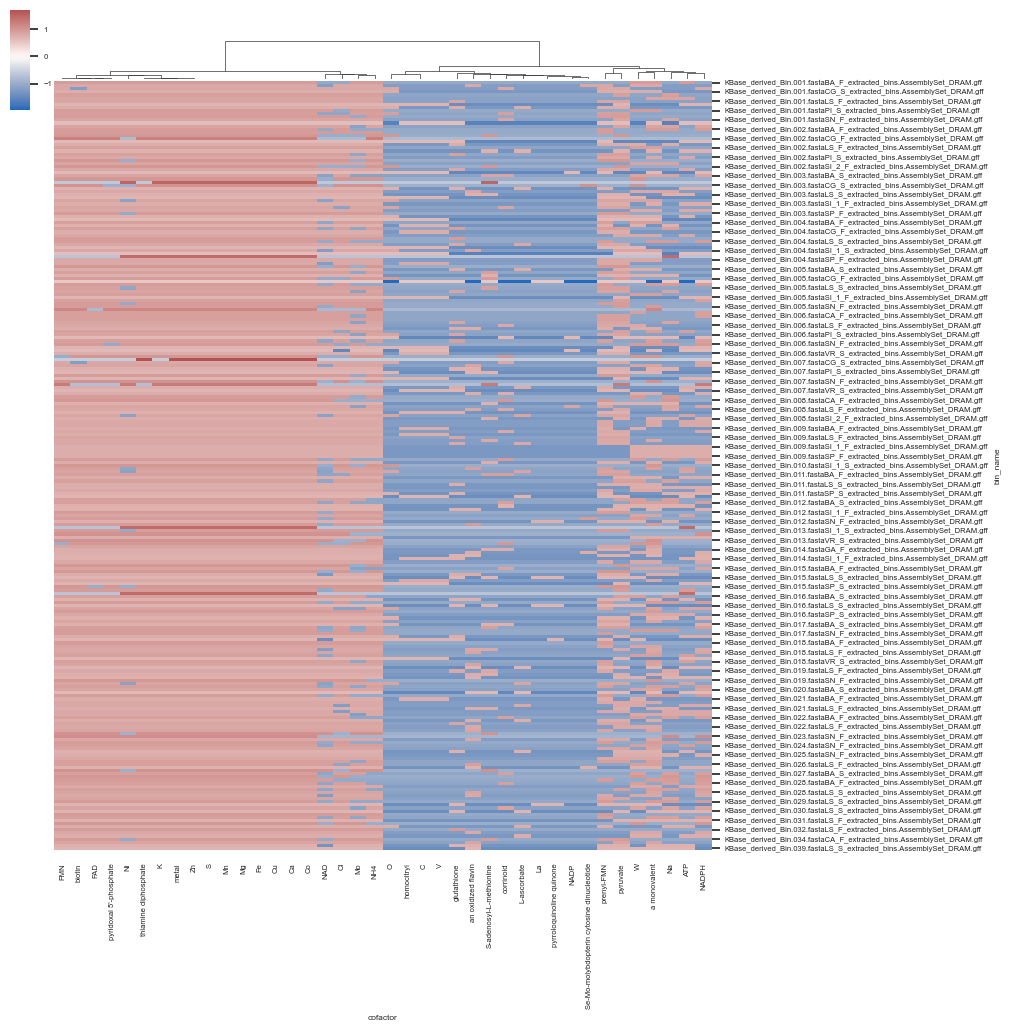

In [19]:
sns.set(font_scale=0.5)

cm = sns.clustermap(
    data, 
    cmap="vlag", 
    center=0, 
    z_score=0, #to set values as a mean of each row
    dendrogram_ratio=0.05, 
    cbar_pos=(0, 0.92, 0.02, 0.10),
    #figsize=(10, 40), # toggle for row readability
    method='ward',
    row_cluster=False
)
    
cm.cax.set_visible(True) # remove color bar for binary data
cm.cax.set_axis_off

In [20]:
# Most impactful features for model outputs
m4f = ["4.1.1.17", "1.9.3.1", "3.5.1.5", "3.2.1.20", "1.1.1.1", "3.2.1.22", "2.1.2.1", "3.5.3.6", "3.2.1.21"]
print(len(m4f), "important model features (04-Model-Eval)")

# Retrieving bin cofactors
import modules.cofactors as cofactors
m4f_cofactors = cofactors.ec2metals(m4f)

# Format
cofactors = m4f_cofactors.drop_duplicates().copy()
cofactors = cofactors.dropna(subset=['CofactorExtracted']).copy()

CofactorFinal = cofactors.drop_duplicates(subset=['Query EC','CofactorFinal']).copy()
CofactorFinal.to_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-feature_importance.csv"), index=False) #SAVE

grouped_cofactors = CofactorFinal.groupby("Query EC", as_index=False)["CofactorFinal"].apply(lambda x: "[%s]" % ', '.join(x))
grouped_cofactors.to_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-feature_importance-grouped.csv"), index=False) #SAVE

grouped_cofactors

9 important model features (04-Model-Eval)


100%|██████████| 9/9 [00:08<00:00,  1.12it/s]


Query EC      CofactorFinal
0   1.1.1.1           [Zn, Fe]
1  3.2.1.20          [NAD, Mn]
2  3.2.1.22  [Mg, Ca, Mn, NAD]
3   3.5.1.5               [Ni]

# Environmental Samples

## Physicochemistry

In [21]:
model_df = pd.read_csv(os.path.join(DATA_DIR, 'model', 'ml-model-output.csv'))
model_df = model_df.rename(columns={"Media Cluster": "media_cluster", "taxon_id": "bin", "neighbor_taxon_id": "taxon_id"})

f_env = pd.read_csv(os.path.join(DATA_DIR, 'MAGs', 'FENIX21', 'envdata.csv'))
f_env = f_env.astype(str)
env_subset = f_env[["SiteID", "site_name", "waterType", "temp", "ph", "spc","sal", "alk_tot"]]
env_subset.head()

SiteID                 site_name waterType   temp    ph    spc    sal  \
0     AS  Acqua sauna lido scoglio       nan   65.0  5.96    nan   36.0   
1     BA                   Bagnone       nan   64.0   7.0    nan    nan   
2     CA             Acqua Cantani   Ca-HCO3  17.48  6.34  2.757   0.14   
3     CF    Terme Caracciolo Forte   Ca-HCO3   53.0  5.36  3.067  0.156   
4     CG            Capasso geyser     Na-Cl   47.2  6.51   9.78  0.528   

  alk_tot  
0     nan  
1     nan  
2  1200.0  
3  1400.0  
4  1400.0

In [22]:
# Merging our metadata with the model output
df1 = model_df
df2 = env_subset

# Using regex to capture the two-letter identifier
df1['SiteID'] = df1['bin'].str.extract(r'fasta([A-Z]{2})_(?:F|S)_extracted_bins')

# Clean up identifiers to ensure they match
df1.loc[:, 'SiteID'] = df1['SiteID'].str.strip().str.upper()
df2.loc[:, 'SiteID'] = df2['SiteID'].str.strip().str.upper()

# Merge our dataframes
benv = pd.merge(left=df1, right=df2, on="SiteID", how="left")

benv.to_csv(os.path.join(DATA_DIR, "model", "output-metadata.csv"), index=False)
benv.head()

Component 1  Component 2  Component 3  Component 4  Component 5  \
0     9.427101     5.556786     5.026694     4.718250     4.642046   
1     9.438310     5.577195     4.848787     4.642054     4.625227   
2     9.447886     5.541127     5.050787     4.717380     4.655841   
3     9.474887     5.521941     5.061490     4.708226     4.687949   
4     9.431704     5.578809     4.869885     4.653165     4.616782   

   Component 6  Component 7  Component 8  Component 9  Component 10  ...  \
0     4.580090     4.598486     4.929774     5.921600      6.780723  ...   
1     4.483598     4.409244     4.932186     5.987400      6.837227  ...   
2     4.581066     4.613263     4.935236     5.921442      6.821482  ...   
3     4.567853     4.590333     4.946699     5.907719      6.889502  ...   
4     4.497761     4.442394     4.926748     5.984292      6.815332  ...   

    taxon_id  media_cluster  SiteID               site_name  waterType   temp  \
0      438.0            NaN      BA                 Bagnone        nan   64.0   
1    28127.0           32.0      BA                 Bagnone        nan   64.0   
2     1496.0            NaN      CF  Terme Caracciolo Forte    Ca-HCO3   53.0   
3  2966552.0           23.0      CG          Capasso geyser      Na-Cl   47.2   
4    28127.0           32.0      FE        Sorgente Ferrata    Ca-HCO3  15.22   

     ph    spc    sal  alk_tot  
0   7.0    nan    nan      nan  
1   7.0    nan    nan      nan  
2  5.36  3.067  0.156   1400.0  
3  6.51   9.78  0.528   1400.0  
4  6.49  1.946    0.1    800.0  

[5 rows x 58 columns]

## Cofactors

### Upset plot (all cofactors)

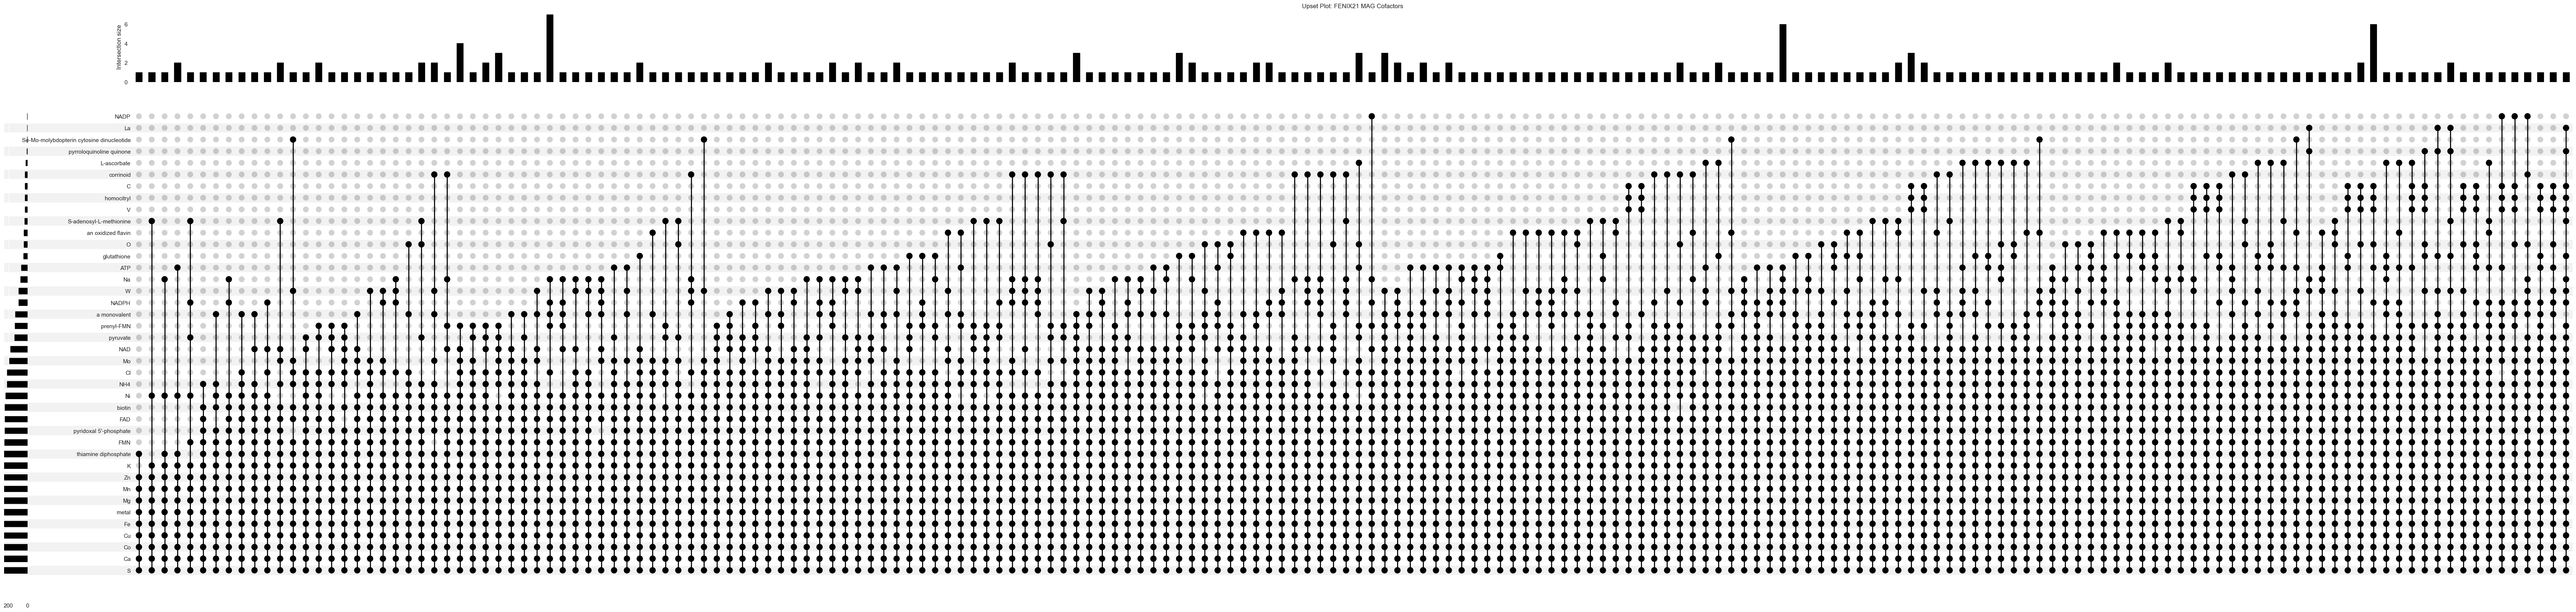

In [104]:
from upsetplot import UpSet, from_memberships
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))
df = df.drop("ec", axis=1).dropna()

# Build matrix for cofactor upset plot
cofactor_matrix = df.pivot_table(index='bin_name', columns='cofactor', aggfunc=lambda x:True, fill_value=False)
cofactor_matrix.set_index(cofactor_matrix.columns.tolist(), inplace=True)
cofactor_matrix = cofactor_matrix.groupby(level=list(range(cofactor_matrix.index.nlevels))).size()

upset = UpSet(cofactor_matrix)
upset.plot()
ax = plt.gca()  # Get the current axis to modify
plt.title('Upset Plot: FENIX21 MAG Cofactors')

plt.gca().set_facecolor('white') 

plt.show()
    # y-axis represents each of our cofactors, x-axis represents the different cases of overlap
    # left-hand bars represent relative abundances of each cofactors across all cases
    # bars above represent how many bins share the same overlap of cofactors

### Upset plot (unique)

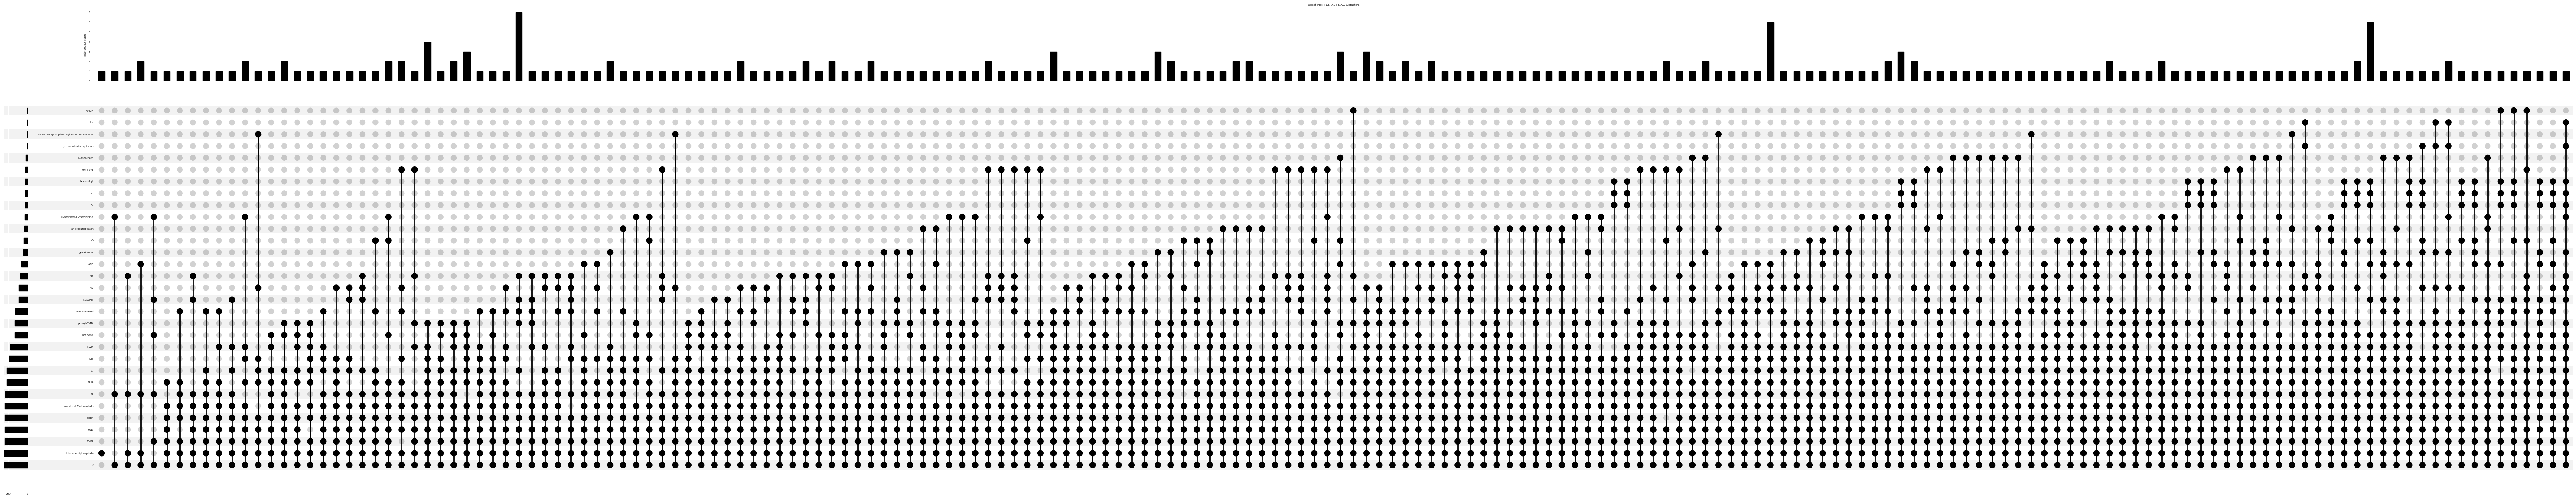

In [24]:
# Hide cofactors which are present everywhere
universal_cofactors = ["S", "Co", "Ca", "Cu", "Fe", "metal", "Mn", "Mg", "Zn"] # K not present in one bin, thiamine diphosphate in two
mask = df["cofactor"].isin(universal_cofactors)
df = df[~mask]

# Build matrix for cofactor upset plot
cofactor_matrix = df.pivot_table(index='bin_name', columns='cofactor', aggfunc=lambda x:True, fill_value=False)
cofactor_matrix.set_index(cofactor_matrix.columns.tolist(), inplace=True)
cofactor_matrix = cofactor_matrix.groupby(level=list(range(cofactor_matrix.index.nlevels))).size()

upset = UpSet(cofactor_matrix)
upset.plot()
ax = plt.gca()  # Get the current axis to modify
plt.title('Upset Plot: FENIX21 MAG Cofactors')

plt.gca().set_facecolor('white') 

plt.show()

### Upset plot (metals only)

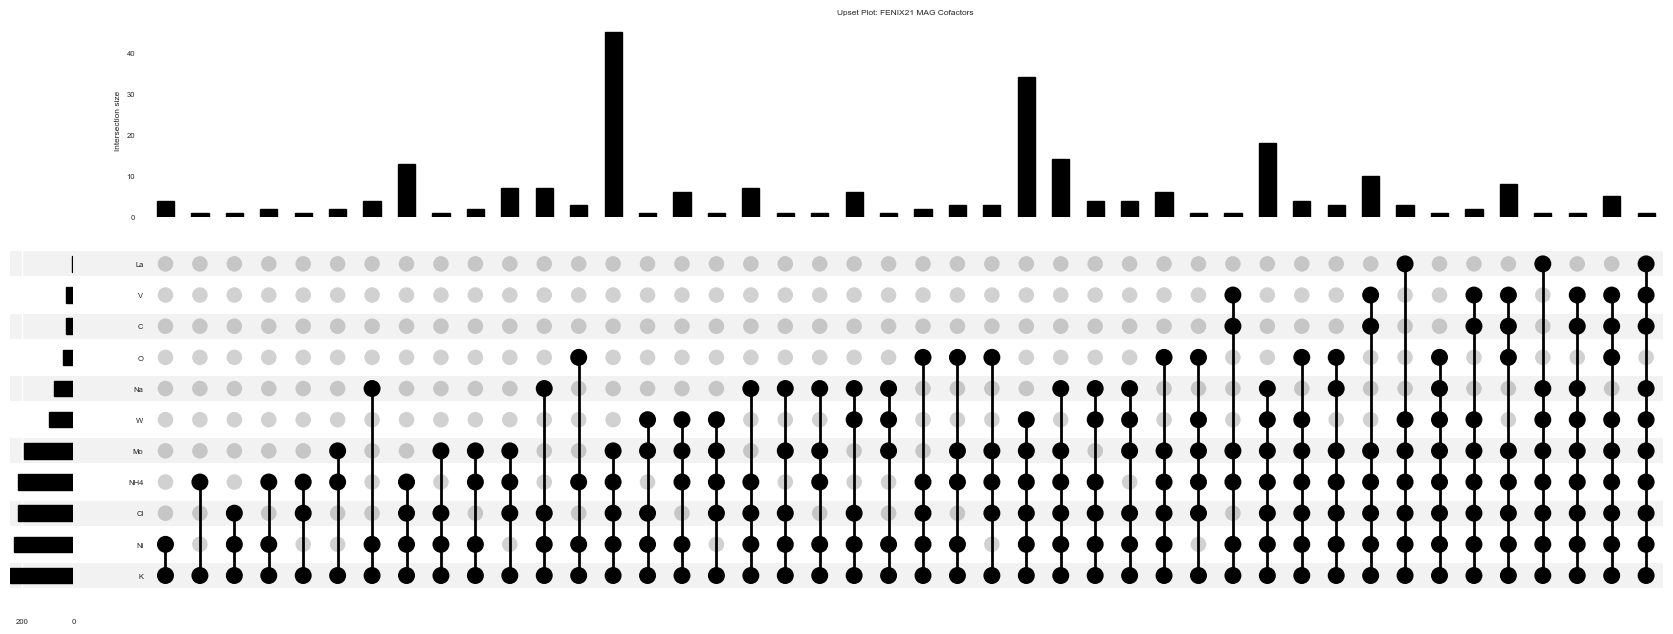

In [25]:
universal_cofactors = ["S", "Co", "Ca", "Cu", "Fe", "metal", "Mn", "Mg", "Zn"]
other_cofactors = ["La", "V", "O", "C", "Na", "W", "Mo", "Cl", "Ni", "NH4", "K"]

mask = df["cofactor"].isin(universal_cofactors)
mask2 = df["cofactor"].isin(other_cofactors)
df = df [mask | mask2]

# Build matrix for cofactor upset plot
cofactor_matrix = df.pivot_table(index='bin_name', columns='cofactor', aggfunc=lambda x:True, fill_value=False)
cofactor_matrix.set_index(cofactor_matrix.columns.tolist(), inplace=True)
cofactor_matrix = cofactor_matrix.groupby(level=list(range(cofactor_matrix.index.nlevels))).size()

upset = UpSet(cofactor_matrix)
upset.plot()
ax = plt.gca()  # Get the current axis to modify
plt.title('Upset Plot: FENIX21 MAG Cofactors')

plt.gca().set_facecolor('white') 

plt.show()

### Upset plot (ICP-MS)

In [134]:
upset_input = pd.DataFrame(cofactor_matrix)
upset_input.to_csv("~/Desktop/upset.csv")

In [139]:
# Giovannelli geochem colormap
color_mapping_url = "https://raw.githubusercontent.com/giovannellilab/geochem/main/inst/extdata/metal-color-mapping.csv"
color_mapping = pd.read_csv(color_mapping_url)
color_mapping = color_mapping.rename(columns={"element": "Metal"}).drop("type", axis=1)
color_mapping["color"] = color_mapping["color"].str.replace("#F7F7F7", "#c46f0e") # change iron from white
color_mapping["color"] = color_mapping["color"] + "75"
palette = dict(zip(color_mapping['Metal'], color_mapping['color']))

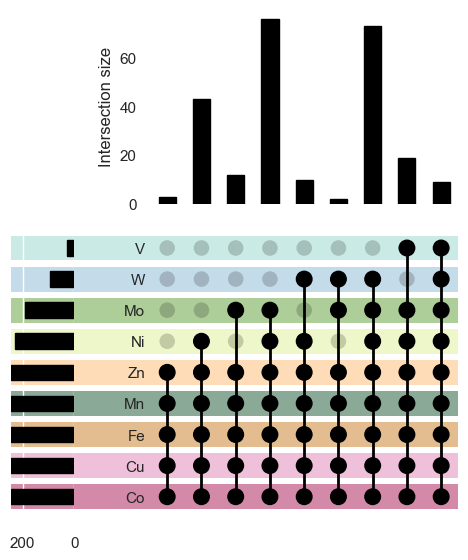

In [141]:
measured_cofactors = ["Fe", "Mn", "Co", "Cu", "Ni", "Zn", "V", "W", "Cl", "Br", "S", "P", "K", "Mg", "Ca"]
measured_metals = ["Fe", "Mn", "Mo", "Co", "Cu", "Ni", "Zn", "V", "W"]

mask = df["cofactor"].isin(measured_metals)
df = df [mask]

# Build matrix for cofactor upset plot
cofactor_matrix = df.pivot_table(index='bin_name', columns='cofactor', aggfunc=lambda x:True, fill_value=False)
cofactor_matrix.set_index(cofactor_matrix.columns.tolist(), inplace=True)
cofactor_matrix = cofactor_matrix.groupby(level=list(range(cofactor_matrix.index.nlevels))).size()



upset = UpSet(cofactor_matrix)

for _, row in color_mapping.iterrows():
    upset.style_categories(
        row["Metal"],
        shading_facecolor=row["color"]
    )

upset.plot()

plt.show()

In [4]:
#cofactor_matrix.to_csv(os.path.join(DATA_DIR, "cofactors", "ICP-MS_overlap.csv"), index=False)

### Bar graph (cofactors)

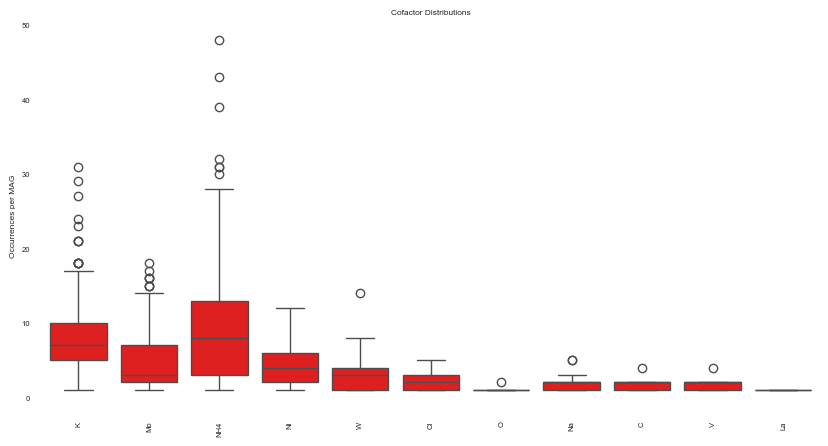

In [26]:
# Count the occurrences of each cofactor per bin
cofactor_counts = df.groupby(['bin_name', 'cofactor']).size().reset_index(name='count')
cofactor_distribution = cofactor_counts.groupby('cofactor')['count'].apply(list).reset_index()

# Convert the data into a long format suitable for seaborn
df_long = cofactor_counts

# Plot the box plots
plt.figure(figsize=(10, 5))
sns.boxplot(x='cofactor', y='count', data=df_long, color='red')
plt.title('Cofactor Distributions')
plt.xticks(rotation=90) 
plt.xlabel('')
#plt.ylim((0, 20))
plt.ylabel('Occurrences per MAG')

plt.gca().set_facecolor('white') 

plt.show()

### Bar plot (cofactors, fluids vs seds)

Cofactor sources: 58025 sediment-derived, 66020 fluid-derived
MAGs: 105 sediment samples, 142 fluid samples


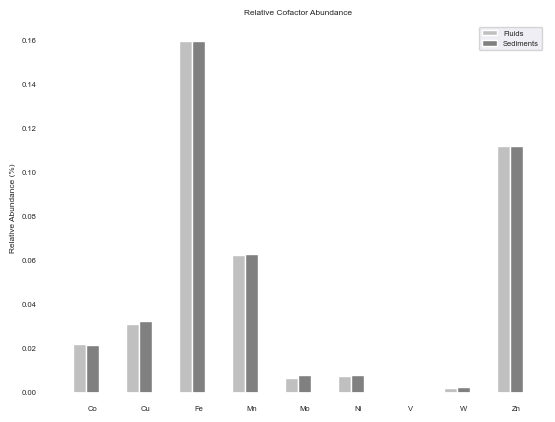

In [27]:
data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))
data = data.dropna()

# Splitting into fluids/sediments
seds = data["bin_name"].str.contains("_S_")
sdf = data[seds]
fdf = data[~seds]

print("Cofactor sources:", len(sdf), "sediment-derived,", len(fdf), "fluid-derived")

# Making lists of bin names
bin_names = data["bin_name"].drop_duplicates()
sbn = bin_names[seds]
fbn = bin_names[~seds]

print("MAGs:", len(sbn), "sediment samples,", len(fbn), "fluid samples")

# Fluid proportions
df1 = fdf.drop(['bin_name', 'ec'], axis=1)
df1["count"] = 1
total1 = len(df1)
flugr = df1.groupby(['cofactor'])['count'].sum().reset_index()
flugr["ratio"] = flugr["count"].div(total1)

# Sediment proportions
df2 = sdf.drop(['bin_name', 'ec'], axis=1)
df2["count"] = 1
total2 = len(df2)
sedgr = df2.groupby(['cofactor'])['count'].sum().reset_index()
sedgr["ratio"] = sedgr["count"].div(total2)

# Filter
metals = ["Fe", "Mn", "V", "Co", "Ni", "Cu", "Zn", "Mo", "W"]
f1 = flugr["cofactor"].isin(metals)
f2 = sedgr["cofactor"].isin(metals)
flumet = flugr[f1]
sedmet = sedgr[f2]

# Merge
flumet = flumet.rename(columns={"count": "fluid_count", "ratio": "fluid_ratio"})
sedmet = sedmet.rename(columns={"count": "sed_count", "ratio": "sed_ratio"})
merged = pd.merge(left=flumet, right=sedmet, on="cofactor", how="left")

N = 9
ind = np.arange(N)  
width = 0.25
  
xvals = merged['fluid_ratio']
bar1 = plt.bar(ind, xvals, width, color = 'silver') 
  
yvals = merged['sed_ratio']
bar2 = plt.bar(ind+width, yvals, width, color='grey') 
  
plt.xticks(ind+width,merged["cofactor"]) 
plt.ylabel("Relative Abundance (%)") 
plt.title("Relative Cofactor Abundance") 
plt.legend((bar1, bar2), ('Fluids', 'Sediments')) 
plt.grid(False)

plt.gca().set_facecolor('white') 

plt.show() 

## Metals vs. Cofactors

### Bar graph (fluids)

In [2]:
data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))
data = data.dropna()

# Splitting into fluids/sediments
seds = data["bin_name"].str.contains("_S_")
sdf = data[seds]
fdf = data[~seds]

print("Cofactor sources:", len(sdf), "sediment-derived,", len(fdf), "fluid-derived")

# Making lists of bin names
bin_names = data["bin_name"].drop_duplicates()
sbn = bin_names[seds]
fbn = bin_names[~seds]

print("MAGs:", len(sbn), "sediment samples,", len(fbn), "fluid samples")

print(sdf.head())
print(fdf.head())

Cofactor sources: 58025 sediment-derived, 66020 fluid-derived
MAGs: 105 sediment samples, 142 fluid samples
                                              bin_name        ec cofactor
574  KBase_derived_Bin.001.fastaBA_S_extracted_bins...  2.7.13.3       Fe
575  KBase_derived_Bin.001.fastaBA_S_extracted_bins...  2.7.13.3       Ca
576  KBase_derived_Bin.001.fastaBA_S_extracted_bins...  2.7.13.3       Cu
577  KBase_derived_Bin.001.fastaBA_S_extracted_bins...  2.7.13.3       Mg
578  KBase_derived_Bin.001.fastaBA_S_extracted_bins...  2.7.13.3        S
                                             bin_name         ec cofactor
2   KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33      NH4
3   KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33       Mn
4   KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33        K
10  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.5.1.19       Zn
11  KBase_derived_Bin.001.fastaBA_F_extracted_bins...  4.2.1.136        K


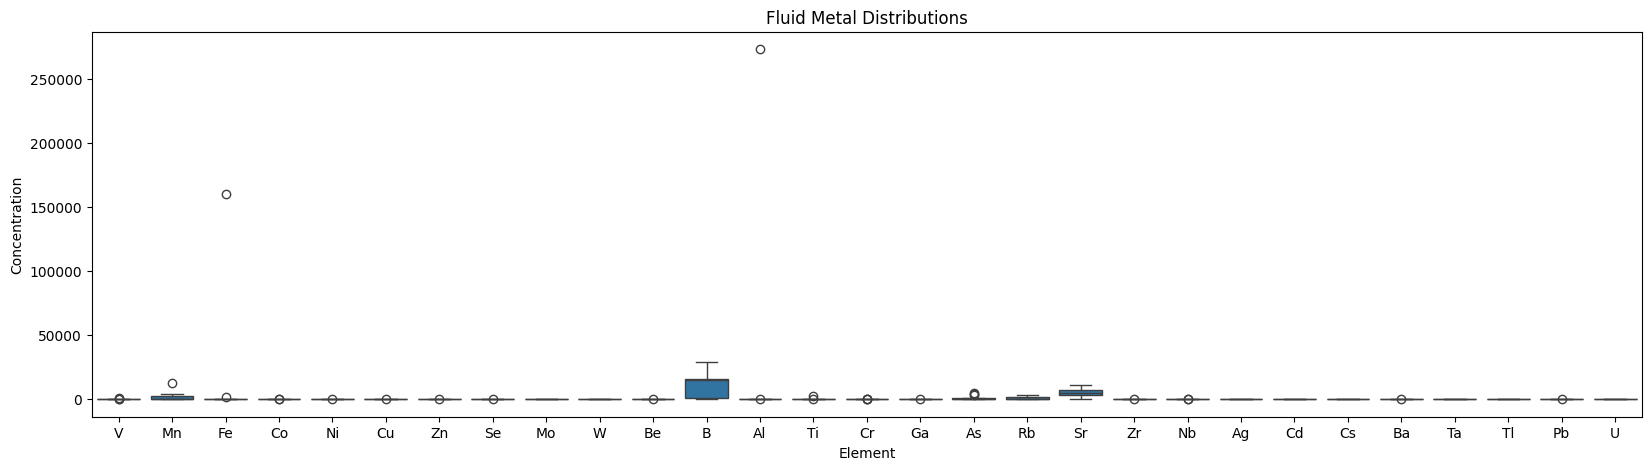

In [3]:
# Fluid metal distributions

fm = pd.read_csv(os.path.join(DATA_DIR, "MAGs", "FENIX21", "fluid_metals.csv"))
df = fm.drop('ExpID', axis=1)

df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
df_melted = df.melt(id_vars=["SiteID"], var_name="Element", value_name="Concentration")
df_melted.dropna(subset=["Concentration"], inplace=True)

# toggle B (attention to plt.ylim())
b = df_melted["Element"].str.contains("b")
df_nob = df_melted[~b]

plt.figure(figsize=(20, 5))
sns.boxplot(x="Element", y="Concentration", data=df_melted)
#plt.ylim((0, 300))
plt.title("Fluid Metal Distributions")
plt.gca().set_facecolor('white') 

plt.show()

fig = px.box(df_melted, 
    x="Element", 
    y="Concentration", 
    points="all",  # Show all points, including outliers
    hover_data=["SiteID"],  # Display SiteID on hover
    #title="Fluid Metal Distributions (all)",
    template="plotly_white"
)
#fig.update_yaxes(range=[0, 500])

fig.show()

### Bar graph (sediments)

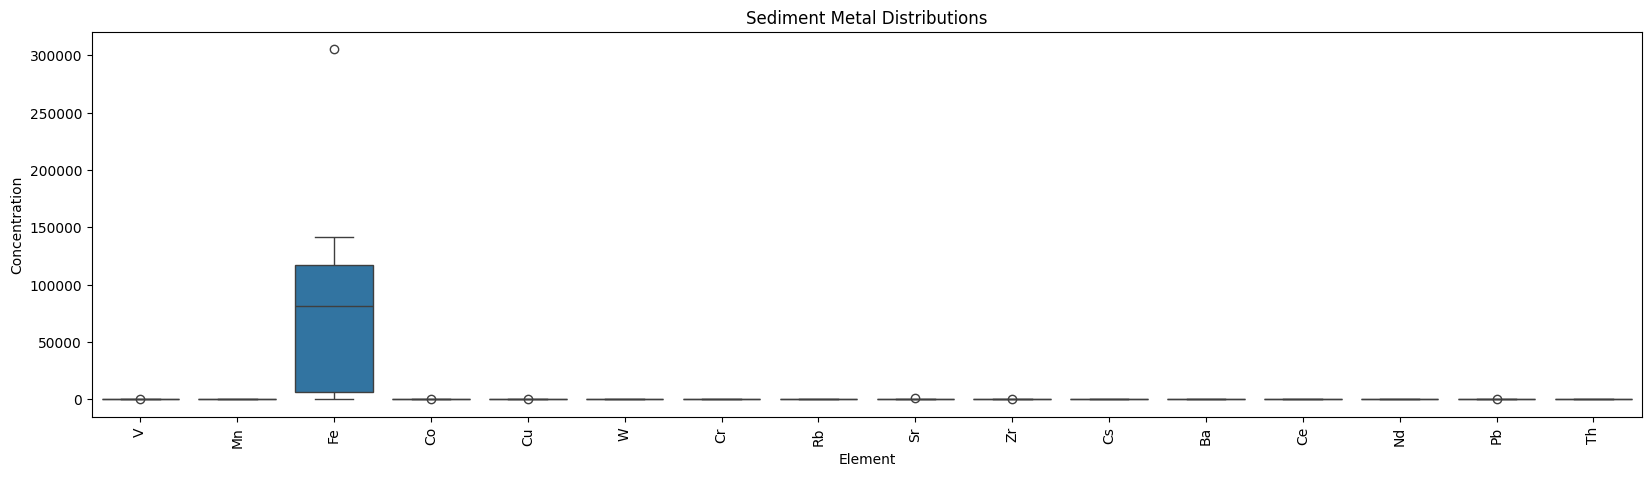

In [4]:
# Sediment metal distributions

sm = pd.read_csv(os.path.join(DATA_DIR, "MAGs", "FENIX21", "sediment_metals.csv"))
df = sm.drop('ExpID', axis=1)

df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
df_melted = df.melt(id_vars=["SiteID"], var_name="Element", value_name="Concentration")
df_melted.dropna(subset=["Concentration"], inplace=True)

plt.figure(figsize=(20, 5))
sns.boxplot(x="Element", y="Concentration", data=df_melted)
#plt.ylim((0, 900)) 
plt.xticks(rotation=90)
plt.title("Sediment Metal Distributions")
plt.gca().set_facecolor('white') 

plt.show()

fig = px.box(df_melted, 
    x="Element", 
    y="Concentration", 
    points="all",  # Show all points, including outliers
    hover_data=["SiteID"], 
    #title="Sediment Metal Distributions",
    template="plotly_white"
)

fig.show()

### Bar comp. (fluids)

In [12]:
# Fluid cofactors:

data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))
data = data.dropna()

bin_names = data["bin_name"].drop_duplicates()
seds = data["bin_name"].str.contains("_S_")
fbn = bin_names[~seds]
fdf = data[~seds]

# Using regex to capture the two-letter identifier
df1 = fdf.copy()
df1['SiteID'] = df1['bin_name'].str.extract(r'fasta([A-Z]{2})_(?:F|S)_extracted_bins')
df1.loc[:, 'SiteID'] = df1['SiteID'].str.strip().str.upper()

print(len(fbn), "fluid samples")

# Fluid metal distributions:

fm = pd.read_csv(os.path.join(DATA_DIR, "MAGs", "FENIX21", "fluid_metals.csv"))
df = fm.drop('ExpID', axis=1)

df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
fluid_melted = df.melt(id_vars=["SiteID"], var_name="Element", value_name="Concentration")
fluid_melted.dropna(subset=["Concentration"], inplace=True)

#fluid_melted.head()

142 fluid samples


In [13]:
# Set cofactor counts for each site
df1["count"] = 1
df1_grouped = df1.groupby(['SiteID', 'cofactor'])['count'].sum().reset_index()

# Sum the number of cofactors for each site
site_total = df1_grouped.groupby(['SiteID'])['count'].sum().reset_index()
site_total = site_total.rename(columns={"count": "site_total"})

# Merge and calculate the normalized ratio for each site
fluid_cofactors = pd.merge(left=df1_grouped, right=site_total, on="SiteID", how="left")
fluid_cofactors["ratio"] = fluid_cofactors.iloc[:,2].div(fluid_cofactors.iloc[:,3])

fluid_cofactors.head()

SiteID cofactor  count  site_total     ratio
0     BA      ATP      2        9245  0.000216
1     BA        C      2        9245  0.000216
2     BA       Ca    349        9245  0.037750
3     BA       Cl     31        9245  0.003353
4     BA       Co    193        9245  0.020876

In [14]:
# Format dataframes for plotting

df1 = fluid_melted
df1['Type'] = 'Concentration'
df1 = df1.rename(columns={'Element': 'Metal', 'Concentration': 'Value'})

df2 = fluid_cofactors.drop(['count', 'site_total'], axis=1)
df2['Type'] = 'Ratio'
df2 = df2.rename(columns={'cofactor': 'Metal', 'ratio': 'Value'})

fluid_combined = pd.concat([df1, df2])

# Filter for the overlap between cofactors and available concentrations: 

fluid_metals = fluid_melted["Element"].to_list()
fm_list = set(fluid_metals)
filter1 = fluid_combined["Metal"].isin(fm_list)

metal_cofactors = fluid_cofactors["cofactor"].to_list()
mc_list = set(metal_cofactors)
filter2 = fluid_combined["Metal"].isin(mc_list)

fluid_combined = fluid_combined[filter1 & filter2]

fluid_combined

SiteID Metal     Value           Type
0       AS     V  2.618000  Concentration
2       CA     V  2.564000  Concentration
3       CF     V  0.363000  Concentration
4       CG     V  0.098000  Concentration
6       FE     V  2.275000  Concentration
..     ...   ...       ...            ...
324     SP    Mo  0.004663          Ratio
329     SP    Ni  0.004080          Ratio
333     SP     V  0.001166          Ratio
334     SP     W  0.002623          Ratio
335     SP    Zn  0.112504          Ratio

[200 rows x 4 columns]

In [5]:
# Toggle filter for high concentration metals
omit = ["Mn", "Fe"]
omm = fluid_combined["Metal"].isin(omit)

fluid_filter = fluid_combined[~omm]
fluid_outlier = fluid_combined[omm]

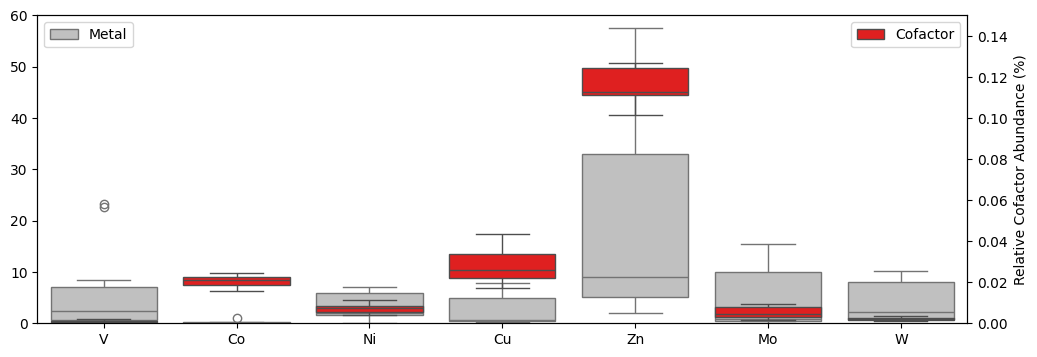

In [6]:
fig, ax1 = plt.subplots(figsize=(12, 4))
plt.gca().set_facecolor('white') 

# Boxplot for Concentration
sns.boxplot(x='Metal', y='Value', data=fluid_filter[fluid_filter['Type'] == 'Concentration'], ax=ax1, color="silver") #hue='Type', palette="dark:silver"
ax1.set_ylabel(None) #'Trace Metal Concentration (ppb)'
ax1.set_xlabel(None)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
sns.boxplot(x='Metal', y='Value', data=fluid_filter[fluid_filter['Type'] == 'Ratio'], ax=ax2, color="red") #hue='Type', palette="Set1"
ax2.set_ylabel('Relative Cofactor Abundance (%)')

ax1.legend(["Metal"], loc='upper left')
ax2.legend(["Cofactor"], loc='upper right')

ax1.grid(False)
ax2.grid(False)

ax1.set_ylim(0, 60)
ax2.set_ylim(0, 0.15)

#plt.title('Fenix21 Fluid [Metal] and Cofactor Distribution')
plt.show()

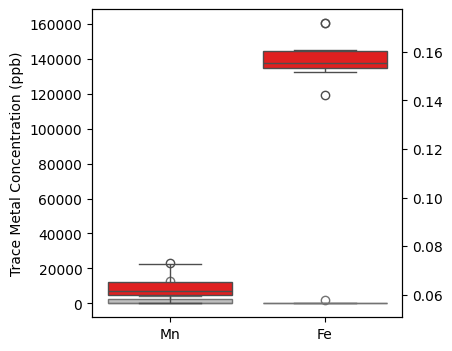

In [7]:
#threshold = 1000 
#filtered_outlier = fluid_outlier[fluid_outlier["Value"] < threshold]

fig, ax1 = plt.subplots(figsize=(4, 4))
plt.gca().set_facecolor('white') 

sns.boxplot(x='Metal', y='Value', data=fluid_outlier[fluid_outlier['Type'] == 'Concentration'], ax=ax1, color="silver")
ax2 = ax1.twinx()
sns.boxplot(x='Metal', y='Value', data=fluid_outlier[fluid_outlier['Type'] == 'Ratio'], ax=ax2, color="red")

# Hide EVERYTHING
ax1.set_ylabel('Trace Metal Concentration (ppb)')
ax2.set_ylabel(None)
ax1.set_xlabel(None)
ax1.grid(False)
ax2.grid(False)

plt.show()

### Correlation Matrix (fluids)

In [26]:
df_1 = df1.copy()
df_2 = df2.copy()

df_1['element'] = df_1['SiteID'] + '_' + df_1['Metal']
df_2['element'] = df_2['SiteID'] + '_' + df_2['Metal']

df_1 = df_1.drop(["Type", "Metal","SiteID"], axis=1).rename(columns={"Value": "Concentration"})
df_2 = df_2.drop(["Type", "Metal","SiteID"], axis=1).rename(columns={"Value": "Ratio"})

corr_df = pd.merge(left=df_1, right=df_2, on="element", how="left")
corr_df = corr_df[["element", "Concentration", "Ratio"]].set_index('element').dropna().T

corr_df.head()

element            CG_V      GA_V      ML_V        PI_V      CA_Mn      CF_Mn  \
Concentration  0.098000  8.444000  2.362000  583.930000  12.856000  13.245000   
Ratio          0.001243  0.000399  0.002107    0.000725   0.064306   0.059635   

element           CG_Mn     FE_Mn       GA_Mn        LS_Mn  ...     GA_Mo  \
Concentration  4.391000  1.043000  924.690000  3739.549000  ...  7.096000   
Ratio          0.061529  0.072516    0.064825     0.056544  ...  0.006084   

element            LS_Mo     ML_Mo     PI_Mo      SN_Mo      CF_W      GA_W  \
Concentration  10.990000  0.066333  0.514333  15.457000  1.194000  8.441000   
Ratio           0.009167  0.003161  0.003987   0.009215  0.002028  0.001695   

element            LS_W      PI_W       SN_W  
Concentration  8.416000  0.840000  10.253000  
Ratio          0.001541  0.001087   0.002857  

[2 rows x 71 columns]

<Axes: xlabel='element', ylabel='element'>

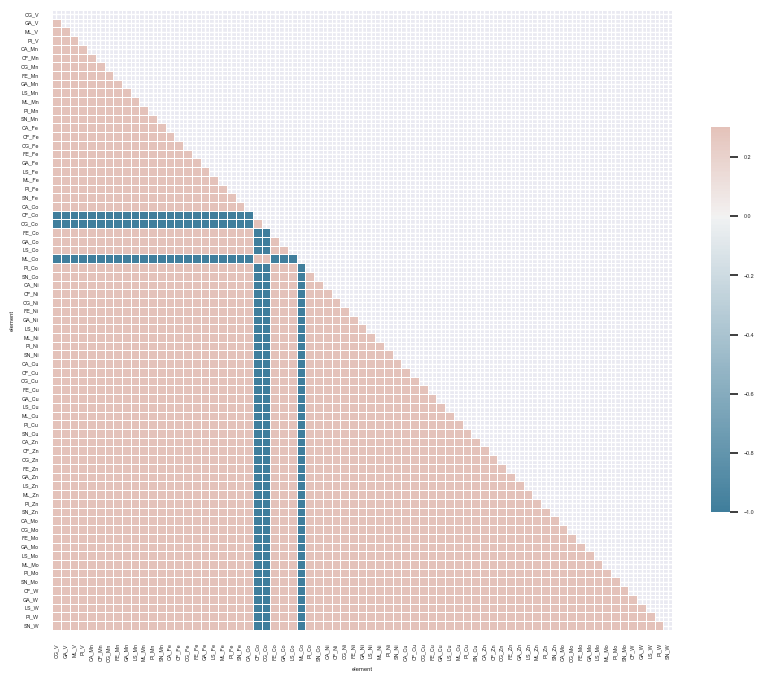

In [29]:
corr = corr_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool)) # hides upper triangle
f, ax = plt.subplots(figsize=(10, 10))

# Diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.set(font_scale=0.35)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Pairplot (fluids)

In [94]:
# Use same dataframe is combined bar plots
pivot = fluid_combined.pivot_table(index=['SiteID', 'Metal'], columns='Type', values='Value').reset_index()

# Use log10 values for ppb concentrations
pivot["log_concentration"] = np.log10(pivot["Concentration"])

# Relabel vars
pivot = pivot.rename(columns={
    "log_concentration": "log(Concentration)",
    "Ratio": "Cofactor Usage"
    })

# Giovannelli geochem colormap
color_mapping_url = "https://raw.githubusercontent.com/giovannellilab/geochem/main/inst/extdata/metal-color-mapping.csv"
color_mapping = pd.read_csv(color_mapping_url)
color_mapping = color_mapping.rename(columns={"element": "Metal"}).drop("type", axis=1)
color_mapping["color"] = color_mapping["color"].str.replace("#F7F7F7", "#c46f0e") # change iron from white
palette = dict(zip(color_mapping['Metal'], color_mapping['color']))

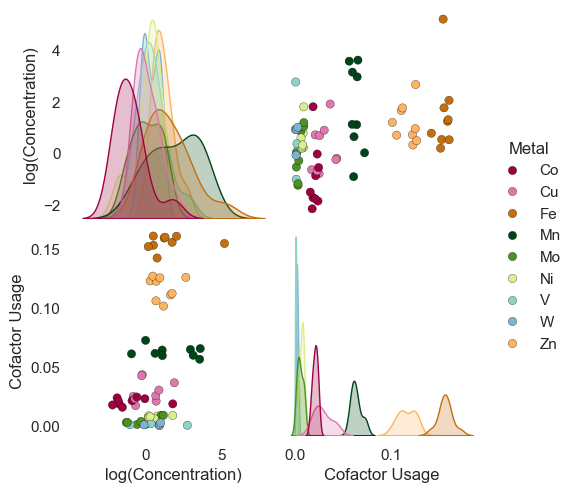

In [95]:
sns.pairplot(
    pivot, 
    hue='Metal', 
    vars=['log(Concentration)', 'Cofactor Usage'], 
    palette=palette, # 'viridis' 'Paired_r'
    plot_kws={'edgecolor': 'black', 'linewidth': 0.2}, 
    #diag_kws={'edgecolor': 'black', 'linewidth': 0.1},
    height=2.5)

### Bar comp. (sediments)

In [37]:
# Sediment cofactors:

data = pd.read_csv(os.path.join(os.path.join(DATA_DIR, "cofactors", "bin-ec-cofactor.csv")))
data = data.dropna()

bin_names = data["bin_name"].drop_duplicates()
seds = data["bin_name"].str.contains("_S_")
sbn = bin_names[seds]
sdf = data[seds]

# Using regex to capture the two-letter identifier
df1 = sdf.copy()
df1['SiteID'] = df1['bin_name'].str.extract(r'fasta([A-Z]{2})_(?:F|S)_extracted_bins')
df1.loc[:, 'SiteID'] = df1['SiteID'].str.strip().str.upper()

print(len(sbn), "sediment samples")


# Sediment metal distributions:

sm = pd.read_csv(os.path.join(DATA_DIR, "MAGs", "FENIX21", "sediment_metals.csv"))
df = sm.drop('ExpID', axis=1)

df.iloc[:, 2:] = df.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
sed_melted = df.melt(id_vars=["SiteID"], var_name="Element", value_name="Concentration")
sed_melted.dropna(subset=["Concentration"], inplace=True)

# Set cofactor counts for each site
df1["count"] = 1
df1_grouped = df1.groupby(['SiteID', 'cofactor'])['count'].sum().reset_index()

# Sum the number of cofactors for each site
site_total = df1_grouped.groupby(['SiteID'])['count'].sum().reset_index()
site_total = site_total.rename(columns={"count": "site_total"})

# Merge and calculate the normalized ratio for each site
sed_cofactors = pd.merge(left=df1_grouped, right=site_total, on="SiteID", how="left")
sed_cofactors["ratio"] = sed_cofactors.iloc[:,2].div(sed_cofactors.iloc[:,3])


# Format dataframes for plotting

df1 = sed_melted
df1['Type'] = 'Concentration'
df1 = df1.rename(columns={'Element': 'Metal', 'Concentration': 'Value'})

df2 = sed_cofactors.drop(['count', 'site_total'], axis=1)
df2['Type'] = 'Ratio'
df2 = df2.rename(columns={'cofactor': 'Metal', 'ratio': 'Value'})

sed_combined = pd.concat([df1, df2])

# Filter for the overlap between cofactors and available concentrations: 

sediment_metals = sed_melted["Element"].to_list()
sm_list = set(sediment_metals)
filter1 = sed_combined["Metal"].isin(sm_list)

metal_cofactors = sed_cofactors["cofactor"].to_list()
mc_list = set(metal_cofactors)
filter2 = sed_combined["Metal"].isin(mc_list)

#sediment_metals = ["V", "Mn", "Co", "Ni", "Cu", "Mo", "W"] # in place of filters 1 & 2
#filter3 = sed_combined["Metal"].isin(sediment_metals)

sed_combined = sed_combined[filter1 & filter2] #filter1 & filter2 ... filter3


# Toggle filter for high concentration metals
omit = ["Fe"]
omm = sed_combined["Metal"].isin(omit)

sed_filter = sed_combined[~omm]
sed_outlier = sed_combined[omm]

105 sediment samples


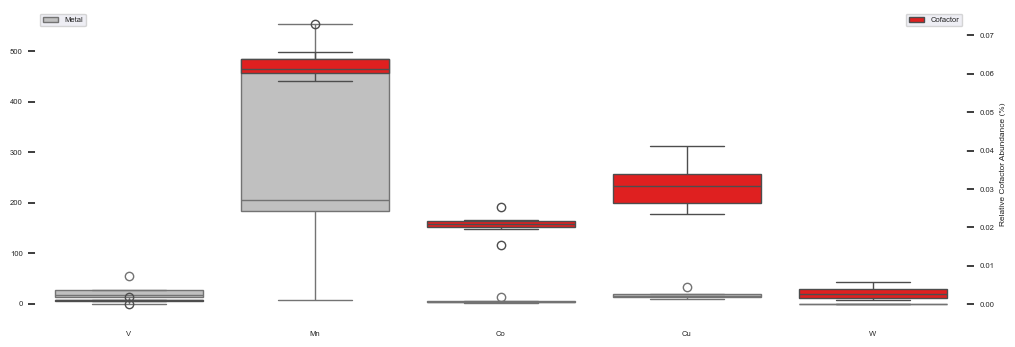

In [38]:
fig, ax1 = plt.subplots(figsize=(12, 4))
plt.gca().set_facecolor('white') 

# Boxplot for Concentration
sns.boxplot(x='Metal', y='Value', data=sed_filter[sed_filter['Type'] == 'Concentration'], ax=ax1, color="silver") #hue='Type', palette="light:g"
ax1.set_ylabel(None) #'Trace Metal Concentration (ppb)'
ax1.set_xlabel(None)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
sns.boxplot(x='Metal', y='Value', data=sed_filter[sed_filter['Type'] == 'Ratio'], ax=ax2, color="red") #hue='Type', palette="Set1"
ax2.set_ylabel('Relative Cofactor Abundance (%)')

ax1.legend(["Metal"], loc='upper left')
ax2.legend(["Cofactor"], loc='upper right')

ax1.grid(False)
ax2.grid(False)

#ax1.set_ylim(0, 60)
#ax2.set_ylim(0, 0.15)

#plt.title('Fenix21 Sediment [Metal] and Cofactor Distribution')
plt.show()

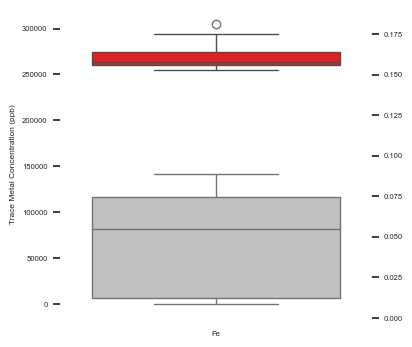

In [39]:
#threshold = 4000 
#sed_outlier = sed_outlier[sed_outlier["Value"] < threshold]

fig, ax1 = plt.subplots(figsize=(4, 4))
plt.gca().set_facecolor('white') 

sns.boxplot(x='Metal', y='Value', data=sed_outlier[sed_outlier['Type'] == 'Concentration'], ax=ax1, color="silver") #hue='Type', palette="light:g"
ax2 = ax1.twinx()
sns.boxplot(x='Metal', y='Value', data=sed_outlier[sed_outlier['Type'] == 'Ratio'], ax=ax2, color="red") #hue='Type', palette="Set1"

# Hide EVERYTHING
ax1.set_ylabel('Trace Metal Concentration (ppb)')
ax2.set_ylim(0,0.19)
ax2.set_ylabel(None)
ax1.set_xlabel(None)
ax1.grid(False)
ax2.grid(False)

plt.show()

## Ions and Transporters

### Filtering for transporters

In [40]:
ml_input = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)

ec7 = ml_input["ec"].str.startswith("7.")
filter = ml_input["ec"].str.contains("-")
transporters = ml_input[ec7 & ~filter] #ec7 & ### PAY ATTENTION TO THIS

print(len(transporters), "transporter annotations:")

# Merge with cofactor information
cf = pd.read_csv(os.path.join(DATA_DIR, "cofactors", "cofactors-taxa.csv"), low_memory=False)
cf = cf.rename(columns={"Query EC": "ec", "CofactorFinal": "cofactor", "Protein names": "proteins", "Function [CC]": "function"})
cf = cf[["ec", "cofactor", "proteins", "function"]]

tran_df = pd.merge(left=transporters, right=cf, on="ec", how="left")

tran_ec = tran_df["ec"].to_list()
ec_set = set(tran_ec)
tran_co = tran_df["cofactor"].to_list()
co_set = set(tran_co)

print(len(ec_set), "unique transporters &", len(co_set)-1, "unique cofactors")
print("Cofactors:", co_set)

39097 transporter annotations:
77 unique transporters & 7 unique cofactors
Cofactors: {nan, 'Mg', 'FMN', 'Zn', 'Fe', 'S', 'FAD', 'Cu'}


In [41]:
# Separate into training and test sets
bins = tran_df["source"].str.contains("KBase")

train = tran_df[~bins].drop(["media_id", "species", "taxon_id", "source"], axis=1)
test = tran_df[bins].drop(["media_id", "species", "source"], axis=1)

print("All EC Class 7 annotations:")
train.head()

All EC Class 7 annotations:


ec cofactor                                           proteins  \
0   7.4.2.8       Zn      Protein translocase subunit SecA (EC 7.4.2.8)   
1   7.1.2.2      NaN                                                NaN   
2   7.1.2.2      NaN                                                NaN   
3  7.6.2.14      NaN                                                NaN   
4   7.1.1.3       Cu  Cytochrome bo(3) ubiquinol oxidase subunit 1 (...   

                                            function  
0  FUNCTION: Required for protein export, interac...  
1                                                NaN  
2                                                NaN  
3                                                NaN  
4  FUNCTION: Cytochrome bo(3) ubiquinol oxidase i...

In [42]:
data = train.copy() 
data = data.astype(str)

keys = ["import ", "export", "symport", "pump", "porin", "channel "] #careful here, e.g., import can grab the word "important" #"transloc", 
filter = data["function"].str.contains('|'.join(keys))
poi = data[filter]

poi_list = poi["proteins"].to_list()
poi_set = set(poi_list)

print("Keys:", keys)
print(len(poi), "total potential annotations of interest")
print(len(poi_set), "unique names")
poi = poi.drop_duplicates()

print("EC:7.-... with keywords:")
poi.head()

Keys: ['import ', 'export', 'symport', 'pump', 'porin', 'channel ']
11322 total potential annotations of interest
7 unique names
EC:7.-... with keywords:


ec cofactor                                           proteins  \
0   7.4.2.8       Zn      Protein translocase subunit SecA (EC 7.4.2.8)   
4   7.1.1.3       Cu  Cytochrome bo(3) ubiquinol oxidase subunit 1 (...   
5   7.1.1.3       Fe  Cytochrome bo(3) ubiquinol oxidase subunit 1 (...   
96  7.1.1.9       Cu  Cbb3-type cytochrome c oxidase subunit CcoN1 (...   
97  7.1.1.9       Fe  Cbb3-type cytochrome c oxidase subunit CcoN1 (...   

                                             function  
0   FUNCTION: Required for protein export, interac...  
4   FUNCTION: Cytochrome bo(3) ubiquinol oxidase i...  
5   FUNCTION: Cytochrome bo(3) ubiquinol oxidase i...  
96  FUNCTION: Cbb3-type cytochrome c oxidase is th...  
97  FUNCTION: Cbb3-type cytochrome c oxidase is th...

In [43]:
# Ions of interest
ions = ["Cl ", "Cl-", "chlorine", "chloride", "-chloride",
       "Br(", "Br-", "bromine", "bromide", "-bromide",
       "NO3", "NO3-", "nitrate", "-nitrate",
       "SO4", "SO42-", "sulfate", "-sulfate",
       "PO4", "PO4-", "PO42-", "PO43-", "-phosphate", 
       "Na", "Na+", "sodium", "sodium-",
       "NH4", "NH4+", "ammonium", "ammonium-",
       "K ", "K(", "K+", "potassium", "potassium-",
       "Mg", "Mg2+", "magnesium", "magnesium-",
       "Ca ", "Ca(", "Ca2+", "calcium", "calcium-", "calcite", "-calcite", "-carbonate", "bicarbonate",
       "+"
       ]

pattern = '|'.join(map(re.escape, ions))
nm_filter = poi['proteins'].str.contains(pattern, case=False, na=False)
fn_filter = poi['function'].str.contains(pattern, case=False, na=False)

name_df = poi[nm_filter]
func_df = poi[fn_filter]
both = poi[nm_filter | fn_filter]

print(len(name_df), "names, and", len(func_df), "functions contain an ion keyword")

5 names, and 7 functions contain an ion keyword


In [44]:
# Focus on names for now:
df = both.copy() 

# Function to find the keyword in a string
def find_keyword(text):
    match = re.search(pattern, text, re.IGNOrgECASE)
    if match:
        return match.group(0)  # Return the matched keyword
    return None

#df['ion'] = df['function'].apply(find_keyword) # need to write better parsing
#df.to_csv("~/Desktop/ion_list.csv", index=False)

df = df.drop('cofactor', axis=1)
df = df.drop_duplicates()

print("EC:7..., keywords, and ion keys:")
df

EC:7..., keywords, and ion keys:


ec                                           proteins  \
0      7.4.2.8      Protein translocase subunit SecA (EC 7.4.2.8)   
4      7.1.1.3  Cytochrome bo(3) ubiquinol oxidase subunit 1 (...   
96     7.1.1.9  Cbb3-type cytochrome c oxidase subunit CcoN1 (...   
492    7.1.3.1  K(+)-insensitive pyrophosphate-energized proto...   
806    7.2.3.1  K(+)-stimulated pyrophosphate-energized sodium...   
1223   7.2.2.8  Copper-exporting P-type ATPase (EC 7.2.2.8) (C...   
14402  7.2.2.3  Sodium/potassium exporting P-type ATPase 1 (EC...   

                                                function  
0      FUNCTION: Required for protein export, interac...  
4      FUNCTION: Cytochrome bo(3) ubiquinol oxidase i...  
96     FUNCTION: Cbb3-type cytochrome c oxidase is th...  
492    FUNCTION: Proton pump that utilizes the energy...  
806    FUNCTION: Sodium pump that utilizes the energy...  
1223   FUNCTION: Couples the hydrolysis of ATP with t...  
14402  FUNCTION: Catalyzes the hydrolysis of ATP coup...

### Mixed bar-scatter (normalized, EC:7 vs ions)

In [45]:
df1 = test.copy()
print(len(df1), "bin annotations")

df1['SiteID'] = df1['taxon_id'].str.extract(r'fasta([A-Z]{2})_(?:F|S)_extracted_bins')
df1.loc[:, 'SiteID'] = df1['SiteID'].str.strip().str.upper()

# Set cofactor counts for each site
df1["count"] = 1
df1_grouped = df1.groupby(['SiteID', 'taxon_id', 'ec', 'cofactor'])['count'].sum().reset_index()

# Sum the number of cofactors for each site
site_total = df1_grouped.groupby(['SiteID'])['count'].sum().reset_index()
site_total = site_total.rename(columns={"count": "ec7_total"})


# Merge and calculate the normalized ratio for each site
norm = pd.merge(left=df1_grouped, right=site_total, on="SiteID", how="left")

norm = norm.drop(['cofactor', 'taxon_id', 'ec', 'count'], axis=1)
norm = norm.drop_duplicates()

sum1 = norm["ec7_total"].sum()
norm["ratio"] = norm["ec7_total"].div(sum1)

bin_counts = {
    "SiteID": ["BA","CA","CF","CG","FE","GA","LS","ML","PI","SI","SN","SP","VR"],
    "n_bins": [51,4,7,11,2,15,48,2,14,34,26,23,10]
}

bin_counts_df = pd.DataFrame(bin_counts)
merged_bins = pd.merge(left=norm, right=bin_counts_df, on="SiteID", how="left")

merged_bins["ratio2"] = merged_bins["ec7_total"].div(merged_bins["n_bins"])
merged_bins.head()

12117 bin annotations


SiteID  ec7_total     ratio  n_bins     ratio2
0     BA       1888  0.213430      51  37.019608
1     CA        137  0.015487       4  34.250000
2     CF        175  0.019783       7  25.000000
3     CG        314  0.035496      11  28.545455
4     FE        100  0.011305       2  50.000000

In [46]:
master = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)
bins = master["source"].str.contains("KBase")

# Filter for bins
test_set = master[bins].copy()

# Strip SiteIDs
test_set['SiteID'] = test_set['taxon_id'].str.extract(r'fasta([A-Z]{2})_(?:F|S)_extracted_bins')
test_set.loc[:, 'SiteID'] = test_set['SiteID'].str.strip().str.upper()
test_set = test_set.drop(["media_id", "species", "source"], axis=1)

test_set.head()

taxon_id         ec SiteID
1661523  KBase_derived_Bin.001.fastaBA_F_extracted_bins...  2.1.1.297     BA
1661524  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   6.1.1.21     BA
1661525  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33     BA
1661526  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.8.1.13     BA
1661527  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.6.1.42     BA

In [47]:
# Normalize abundances
test_set["count"] = 1
grouped_test = test_set.groupby(['SiteID'])['count'].sum().reset_index()
grouped_test = grouped_test.rename(columns={"count": "site_total"})

# Formate
norm2 = pd.merge(left=test_set, right=grouped_test, on="SiteID", how="left")
norm2 = norm2.drop(['taxon_id', 'ec', 'count'], axis=1)
norm2 = norm2.drop_duplicates()

# Merge
merged = pd.merge(left=norm, right=norm2, on="SiteID", how="left")
merged["ratio"] = merged["ec7_total"].div(merged["site_total"])
merged.head()

SiteID  ec7_total     ratio  site_total
0     BA       1888  0.088361     21367.0
1     CA        137  0.099275      1380.0
2     CF        175  0.074153      2360.0
3     CG        314  0.079173      3966.0
4     FE        100  0.082102      1218.0

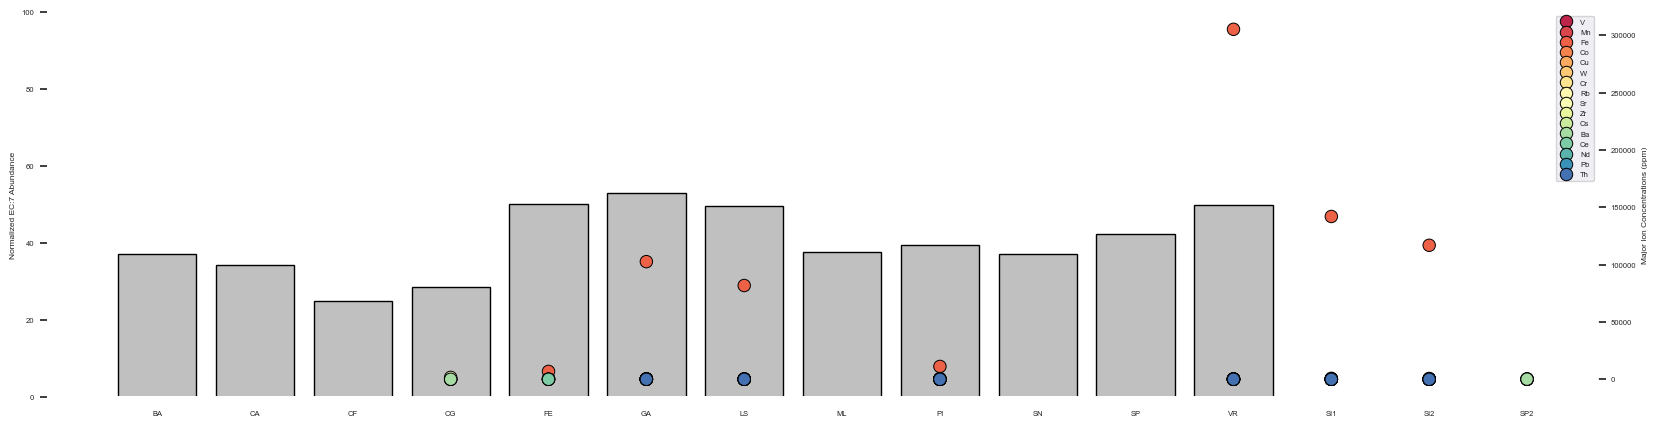

In [48]:
fig, ax1 = plt.subplots(figsize=(20, 5))
plt.gca().set_facecolor('white') 

sns.barplot(x="SiteID", y="ratio2", data=merged_bins, ax=ax1, color="silver", edgecolor='black') #or ratio2, merged_bins
ax1.set_xlabel('')
ax1.set_ylabel('Normalized EC:7 Abundance')
ax1.set_ylim(0, 100)
ax1.tick_params(axis='y')
ax1.grid(False)

ax2 = ax1.twinx()
sns.scatterplot(x="SiteID", y="Concentration", hue="Element", palette="Spectral", data=df_melted, s=80, edgecolor='black', ax=ax2)
ax2.set_ylabel('Major Ion Concentrations (ppm)')
ax2.tick_params(axis='y')
ax2.legend(loc="upper right")
ax2.grid(False)

plt.show()

### Mixed bar-scatter (raw abundances)

In [49]:
# EC Class 7 (test set)
data = test.copy()
data = data.rename(columns={"taxon_id": "bin_name"})

data['SiteID'] = data['bin_name'].str.extract(r'fasta([A-Z]{2})_(?:F|S)_extracted_bins')
data.loc[:, 'SiteID'] = data['SiteID'].str.strip().str.upper()

# Fluid ion distributions:
ion_df = pd.read_csv(os.path.join(DATA_DIR, "MAGs", "FENIX21", "major_ions.csv"))
df = ion_df.copy()

df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df_melted = df.melt(id_vars=["SiteID"], var_name="Element", value_name="Concentration")
df_melted.dropna(subset=["Concentration"], inplace=True)

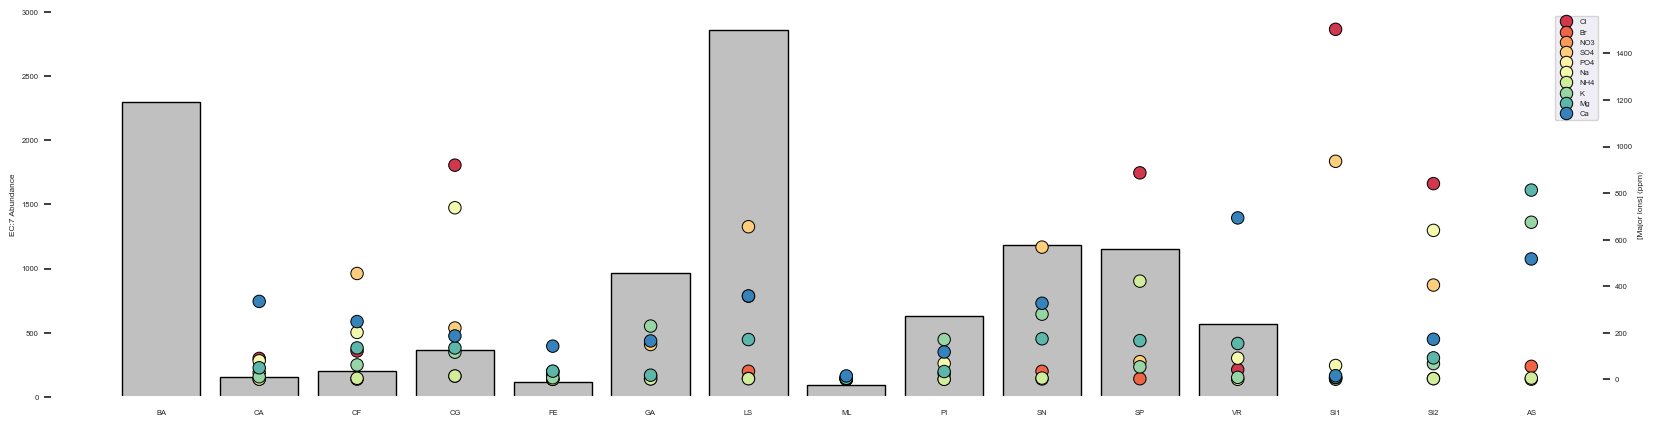

In [50]:
# Data for bar plots
data["count"] = 1
abundance_by_siteid = data.groupby('SiteID')['count'].sum()
bardf = pd.DataFrame(abundance_by_siteid)

fig, ax1 = plt.subplots(figsize=(20, 5))
plt.gca().set_facecolor('white') 

sns.barplot(x="SiteID", y="count", data=bardf, estimator=sum, ax=ax1, color="silver", edgecolor='black')
ax1.set_xlabel('')
ax1.set_ylabel('EC:7 Abundance')
ax1.tick_params(axis='y')
ax1.grid(False)

ax2 = ax1.twinx()
sns.scatterplot(x="SiteID", y="Concentration", hue="Element", palette="Spectral", data=df_melted, s=80, edgecolor='black', ax=ax2)
ax2.set_ylabel('[Major Ions] (ppm)')
ax2.tick_params(axis='y')
ax2.legend(loc="upper right")
ax2.grid(False)

plt.show()

### Bar graph (fluid ions)

C:\Users\jakel\AppData\Local\Temp\ipykernel_21088\2212048352.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



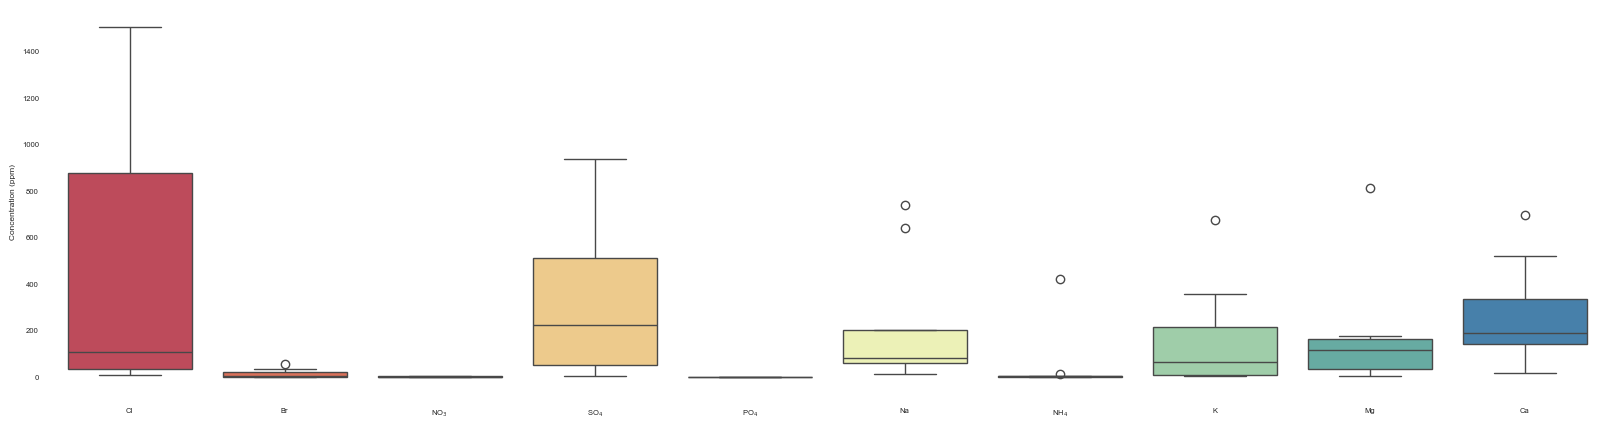

In [51]:
plt.figure(figsize=(20, 5))
plt.gca().set_facecolor('white') 

sns.boxplot(x="Element", y="Concentration", data=df_melted, hue="Element", palette="Spectral")
#plt.title("Major Ion Distributions")

# Modify the x-tick labels to display subscripts
ax1 = plt.gca()
ax1.set_xticklabels([label.get_text().replace("O4", "O$_4$").replace("O3", "O$_3$").replace("H4", "H$_4$") for label in ax1.get_xticklabels()])
ax1.set_xlabel('')
ax1.set_ylabel('Concentration (ppm)')

plt.show()

# Taxonomy

## Training Set

Media species names

In [52]:
media = pd.read_csv(os.path.join(DATA_DIR, "mediadive", "mediadive-all.csv"), sep=";")
media_species = media[["media_id", "name", "species"]]
media_species = media_species.dropna()
print(len(media_species))
media_species.head()

29870


media_id                               name                 species
1       1a  REACTIVATION WITH LIQUID MEDIUM 1  Comamonas testosteroni
2       1a  REACTIVATION WITH LIQUID MEDIUM 1     Delftia acidovorans
3       1a  REACTIVATION WITH LIQUID MEDIUM 1  Acidovorax delafieldii
4       1a  REACTIVATION WITH LIQUID MEDIUM 1      Pseudomonas putida
5       1a  REACTIVATION WITH LIQUID MEDIUM 1   Pseudomonas koreensis

ML Output (raw output, removed bins)

In [53]:
# Training output with clustering and classification
train_df = pd.read_csv(os.path.join(DATA_DIR, 'model', 'train-output.csv'))

# BacDive taxonomy information
bacdive_df = pd.read_csv(os.path.join(DATA_DIR, "bacdive", "bacdive-all.csv"), low_memory=False)
bd_taxonomy = bacdive_df[["taxon_id", "domain", "phylum", "class", "order", "family", "genus", "species"]]

neighbors_list = train_df["taxon_id"].to_list()
neighbors = bd_taxonomy["taxon_id"].isin(neighbors_list)
bd_taxonomy = bd_taxonomy[neighbors]
bd_taxonomy = bd_taxonomy.drop_duplicates()

# Merge for neighbor_taxonomy information (multiple taxonomic classifications for some taxon_id's)
train_taxa = pd.merge(left=train_df, right=bd_taxonomy, on="taxon_id", how="left")
train_taxa = train_taxa.drop_duplicates()

#train_taxa.to_csv(os.path.join(DATA_DIR, "model", "train-taxa.csv"), index=False)
train_taxa = train_taxa[["Target", "taxon_id", "domain", "phylum", "class", "order", "family","genus", "species"]]
train_taxa = train_taxa.rename(columns={
    "domain": "Domain",
    "phylum": "Phylum",
    "class": "Class",
    "order": "Order",
    "family": "Family", 
    "genus": "Genus",
    "species": "Species"
})

print(len(train_df), "training samples,", len(train_taxa), "taxonomic classifications")
print("Important! Expands for multiple taxonomic-level classifications for a single taxon_id, use og frame for mapping")

print(len(train_taxa))
train_taxa.head()

8464 training samples, 25006 taxonomic classifications
Important! Expands for multiple taxonomic-level classifications for a single taxon_id, use og frame for mapping
25006


Target  taxon_id    Domain          Phylum                Class  \
0   J346     100.0  Bacteria  Proteobacteria  Alphaproteobacteria   
1   J346     100.0  Bacteria  Actinobacteria       Actinobacteria   
2   J346     100.0  Bacteria  Actinobacteria       Actinobacteria   
3   J386     100.0  Bacteria  Proteobacteria  Alphaproteobacteria   
4   J386     100.0  Bacteria  Actinobacteria       Actinobacteria   

             Order            Family             Genus  \
0  Caulobacterales  Caulobacteraceae  Phenylobacterium   
1  Actinomycetales  Mycobacteriaceae     Mycobacterium   
2  Actinomycetales  Mycobacteriaceae     Mycobacterium   
3  Caulobacterales  Caulobacteraceae  Phenylobacterium   
4  Actinomycetales  Mycobacteriaceae     Mycobacterium   

                    Species  
0  Phenylobacterium panacis  
1     Mycobacterium triplex  
2    Mycobacterium branderi  
3  Phenylobacterium panacis  
4     Mycobacterium triplex

Taxonomy of K-Neighbors (nearest neighbors of bins)

In [54]:
# Model output with clustering and classification
model_df = pd.read_csv(os.path.join(DATA_DIR, 'model', 'ml-model-output.csv'))
model_df = model_df.rename(columns={"Media Cluster": "media_cluster", "taxon_id": "bin", "neighbor_taxon_id": "taxon_id"})

# BacDive taxonomy information
bacdive_df = pd.read_csv(os.path.join(DATA_DIR, "bacdive", "bacdive-all.csv"), low_memory=False)
bd_taxonomy = bacdive_df[["taxon_id", "domain", "phylum", "class", "order", "family", "genus", "species"]]

neighbors_list = model_df["taxon_id"].to_list()
neighbors = bd_taxonomy["taxon_id"].isin(neighbors_list)
bd_taxonomy = bd_taxonomy[neighbors]
bd_taxonomy = bd_taxonomy.drop_duplicates()

# Merge for neighbor_taxonomy information (multiple taxonomic classifications for some taxon_id's)
model_neighbors = pd.merge(left=model_df, right=bd_taxonomy, on="taxon_id", how="left")

model_neighbors.to_csv(os.path.join(DATA_DIR, "model", "test-taxa.csv"), index=False)
model_neighbors.head()

Component 1  Component 2  Component 3  Component 4  Component 5  \
0     9.427101     5.556786     5.026694      4.71825     4.642046   
1     9.427101     5.556786     5.026694      4.71825     4.642046   
2     9.427101     5.556786     5.026694      4.71825     4.642046   
3     9.427101     5.556786     5.026694      4.71825     4.642046   
4     9.427101     5.556786     5.026694      4.71825     4.642046   

   Component 6  Component 7  Component 8  Component 9  Component 10  ...  \
0      4.58009     4.598486     4.929774       5.9216      6.780723  ...   
1      4.58009     4.598486     4.929774       5.9216      6.780723  ...   
2      4.58009     4.598486     4.929774       5.9216      6.780723  ...   
3      4.58009     4.598486     4.929774       5.9216      6.780723  ...   
4      4.58009     4.598486     4.929774       5.9216      6.780723  ...   

   neighbor_media_id  taxon_id  media_cluster    domain          phylum  \
0               J654     438.0            NaN  Bacteria  Actinobacteria   
1               J654     438.0            NaN  Bacteria  Proteobacteria   
2               J654     438.0            NaN  Bacteria  Proteobacteria   
3               J654     438.0            NaN  Bacteria  Planctomycetes   
4               J654     438.0            NaN  Bacteria      Firmicutes   

                class             order             family             genus  \
0      Actinobacteria   Actinomycetales    Nocardiopsaceae   Haloactinospora   
1  Betaproteobacteria   Burkholderiales     Sutterellaceae        Sutterella   
2  Betaproteobacteria   Burkholderiales     Sutterellaceae    Mesosutterella   
3       Phycisphaerae  Tepidisphaerales  Tepidisphaeraceae     Tepidisphaera   
4          Clostridia     Eubacteriales     Clostridiaceae  Terrisporobacter   

                         species  
0           Haloactinospora alba  
1   Sutterella megalosphaeroides  
2     Mesosutterella multiformis  
3           Tepidisphaera mucosa  
4  Terrisporobacter petrolearius  

[5 rows x 57 columns]

## Test Set (Fenix21)

In [55]:
mags = pd.read_csv("~/Desktop/media_mapping/prediction_test/TEST1.csv") #TODO: UPDATE!
mag_tax = pd.read_csv("~/Desktop/fenix21/GTDB-k/all-taxonomy.csv")
mag_tax.head()

User Genome    Domain  \
0  Bin.001.fastaPI_F_extracted_bins.AssemblySet.f...  Bacteria   
1  Bin.006.fastaPI_S_extracted_bins.AssemblySet.f...  Bacteria   
2  Bin.004.fastaPI_F_extracted_bins.AssemblySet.f...  Bacteria   
3  Bin.009.fastaPI_S_extracted_bins.AssemblySet.f...  Bacteria   
4  Bin.002.fastaPI_F_extracted_bins.AssemblySet.f...  Bacteria   

           Phylum                Class                Order  \
0  Pseudomonadota  Gammaproteobacteria  Acidithiobacillales   
1  Pseudomonadota  Gammaproteobacteria  Acidithiobacillales   
2  Pseudomonadota  Gammaproteobacteria  Acidithiobacillales   
3  Pseudomonadota  Gammaproteobacteria  Acidithiobacillales   
4  Pseudomonadota  Gammaproteobacteria  Acidithiobacillales   

                 Family                Genus  \
0  Acidithiobacillaceae    Acidithiobacillus   
1  Acidithiobacillaceae    Acidithiobacillus   
2  Acidithiobacillaceae    Acidithiobacillus   
3  Acidithiobacillaceae    Acidithiobacillus   
4  Acidithiobacillaceae  Acidithiobacillus_B   

                             Species  
0      Acidithiobacillus ferridurans  
1      Acidithiobacillus ferridurans  
2      Acidithiobacillus thiooxidans  
3      Acidithiobacillus thiooxidans  
4  Acidithiobacillus_B sulfuriphilus

In [56]:
phylum1 = train_taxa["Phylum"].to_list()
phylum2 = mag_tax["Phylum"].to_list()
ph1 = set(phylum1)
ph2 = set(phylum2)

class1 = train_taxa["Class"].to_list()
class2 = mag_tax["Class"].to_list()
cl1 = set(class1)
cl2 = set(class2)

order1 = train_taxa["Order"].to_list()
order2 = mag_tax["Order"].to_list()
or1 = set(order1)
or2 = set(order2)

family1 = train_taxa["Family"].to_list()
family2 = mag_tax["Family"].to_list()
fa1 = set(family1)
fa2 = set(family2)

genus1 = train_taxa["Genus"].to_list()
genus2 = mag_tax["Genus"].to_list()
ge1 = set(genus1)
ge2 = set(genus2)

species1 = train_taxa["Species"].to_list()
species2 = mag_tax["Species"].to_list()
sp1 = set(species1)
sp2 = set(species2)

In [57]:
phylum_overlap = ph1.intersection(ph2)
class_overlap = cl1.intersection(cl2)
order_overlap = or1.intersection(or2)
family_overlap = fa1.intersection(fa2)
genus_overlap = ge1.intersection(ge2)
species_overlap = sp1.intersection(sp2)

print(len(ph2), phylum_overlap)
print(len(cl2), class_overlap)
print(len(or2), order_overlap)
print(len(fa2), family_overlap)
print(len(ge2), genus_overlap)
print(len(sp2), species_overlap)

39 {'Actinomycetota', 'Nitrospirota', 'Pseudomonadota', 'Bacteroidota', 'Bacillota'}
67 {'Elusimicrobia', 'Gammaproteobacteria', 'Gemmatimonadetes', 'Verrucomicrobiae', 'Anaerolineae', 'Ignavibacteria', 'Alphaproteobacteria', 'Phycisphaerae', 'Thermodesulfobacteria', 'Thermoprotei', 'Nitrososphaeria', 'Deinococci', 'Aquificae', 'Thermodesulfovibrionia', 'Bacilli', 'Bacteroidia', 'Planctomycetia', 'Chloroflexia', 'Thermotogae'}
102 {'Anaerolineales', 'Aquificales', 'Rhodobacterales', 'Thermodesulfovibrionales', 'Pirellulales', 'Sphingobacteriales', 'Propionibacteriales', 'Chromatiales', 'Methylococcales', 'Flavobacteriales', 'Thermodesulfobacteriales', 'Campylobacterales', 'Sphingomonadales', 'Pseudomonadales', 'Burkholderiales', 'Thiotrichales', 'Desulfurellales', 'Acidithiobacillales', 'Elusimicrobiales', 'Xanthomonadales', 'Bacteroidales', 'Deinococcales', 'Gemmatimonadales', 'Rhizobiales'}
124 {'Sphingobacteriaceae', 'Acidithiobacillaceae', 'Acidobacteriaceae', 'Alteromonadaceae', '

In [58]:
#TODO: mag_tax has many NA values for many levels of taxonomy, could show the distributions using the alpha diversity bars

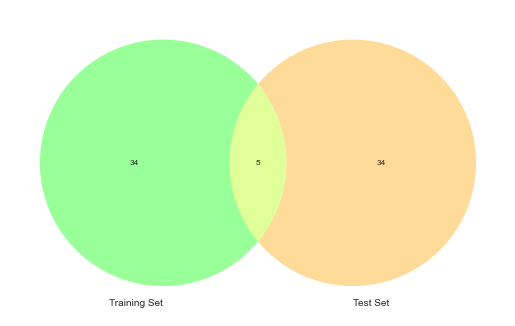

In [59]:
venn2(
    subsets=[ph1, ph2],
    set_labels=["Training Set", "Test Set"],
    set_colors=["lime", "orange"]
)

# Model Visualization

## Training Set

In [6]:
# Model outputs
train = pd.read_csv(os.path.join(DATA_DIR, "model", "train-output.csv"))
test = pd.read_csv(os.path.join(DATA_DIR, "model", "test-output.csv"))
print(len(train), "training points,", len(test), "test points")

# Highest-importance features
dim1 = "Component 38" 
dim2 = "Component 33"

# Initiate Sliders
steps = []
for i in range(11):  # 0 to 1 in steps of 0.1
    step = dict(
        method="restyle",
        args=[{"marker.opacity": [i/20]}, [0]],  # Adjust opacity of the training points trace only (trace index [0])
        label=str(i/20)
    )
    steps.append(step)

sliders = [dict(
    active=1,  # Initial value corresponding to opacity=0.1 (i.e., 1st step)
    currentvalue={"prefix": "Opacity: "},
    pad={"t": 50},
    steps=steps
)]

8464 training points, 247 test points


### Scatter (clusters)

In [8]:
fig = px.scatter(
    data_frame = train,
    x = dim1,
    y = dim2, 
    color = "Media Cluster", 
    hover_data = ["taxon_id", "Target", "KMeans Cluster"], 
    opacity = 1,
    width=500, 
    height=500
) 

fig.add_trace(
    go.Scatter(
        x=test[dim1],  # x coordinates
        y=test[dim2],  # y coordinates
        mode='markers',
        marker=dict(
            color="black",  
            size=5,  
            opacity=1.0 
        ),
        text=test["taxon_id"]  # marker hover text
    )
)

fig.update_layout(
    sliders=sliders,
    title="40 Dimensions, Training & Test Model Outputs",
    template="plotly_white",
    showlegend=False,
    autosize=True
)

fig.show()

### Scatter (taxonomy)

In [10]:
# Metadata and subsets: 
train = pd.read_csv(os.path.join(DATA_DIR, "model", "train-taxa.csv"))
test = pd.read_csv(os.path.join(DATA_DIR, "model", "output-metadata.csv")) # comes from Bin metadata section, this was added post-
print(len(train), "training points,", len(test), "test points")

# Weird formatting stuff for metadata
test["temp"] = test["temp"].astype(str)
test["ph"] = test["ph"].astype(str)

temp = test.copy()
temp["temp"] = temp["temp"].dropna()
temp_nan = temp["temp"].str.contains("nan")
temp = temp[~temp_nan]
temp["temp"] = temp["temp"].astype("f8")

ph = test.copy()
ph["ph"] = ph["ph"].dropna()
ph_nan = ph["ph"].str.contains("nan")
ph = ph[~ph_nan]
ph["ph"] = ph["ph"].astype("f8")

print(len(temp), "points with temperature data", len(ph), "points with pH data")

25006 training points, 247 test points
190 points with temperature data 190 points with pH data


In [11]:
fig = px.scatter(
    data_frame = train,
    x = dim1,
    y = dim2, 
    color = "class",
    hover_data = ["taxon_id", "Target", "KMeans Cluster"],
    #opacity = 0.5,
    #title = "Class-Level Taxonomy, Training Set",
    template="plotly_white",
    width=500, 
    height=500
) 

fig.update_layout(showlegend=False)

fig.show()

Note: no strong correlation in the way taxonomic classes cluster -- could potentially suggest that to categorize metabolism in this way is good, considering taxa don't share the same "metabolic features", or could simply be model bias due to the annotations used.

## Test Set (Fenix21)

### Scatter (metadata)

In [12]:
fig = px.scatter(
    data_frame = test,
    x = dim1,
    y = dim2, 
    color = "SiteID",
    color_discrete_sequence=px.colors.sequential.Agsunset,
    hover_data = ["bin", "RF Classify"],
    #opacity = 0.2,
    #title = "SiteID, Test Set",
    template="plotly_white",
    width=500, 
    height=500
) 

fig.show()

In [13]:
fig = px.scatter(
    data_frame = temp,
    x = dim1,
    y = dim2, 
    color = "temp",
    #color_continuous_scale=px.colors.cyclical.IceFire,
    color_continuous_scale=px.colors.sequential.thermal,
    hover_data = ["bin", "RF Classify"],
    #opacity = 0.2,
    #title = "Temperature, Test Set",
    template="plotly_white",
    width=500, 
    height=500
) 

fig.show()

In [14]:
fig = px.scatter(
    data_frame = ph,
    x = dim1,
    y = dim2, 
    color = "ph",
    color_continuous_scale=px.colors.sequential.thermal,
    hover_data = ["bin", "RF Classify"],
    #opacity = 0.2,
    #title = "pH, Test Set",
    template="plotly_white",
    width=500, 
    height=500
) 

fig.show()

Note: no strong or apparently visible correlation in any of these features, suggesting metabolic features are independent of these conditions

In [15]:
fig = px.scatter(
    data_frame = ph,
    x = dim1,
    y = dim2, 
    color = "waterType",
    color_continuous_scale=px.colors.sequential.thermal,
    hover_data = ["bin", "RF Classify"],
    #opacity = 0.2,
    #title = "pH, Test Set",
    template="plotly_white",
    width=500, 
    height=500
) 

fig.show()

### Scatter (taxonomy)

In [16]:
bin_taxonomy = pd.read_csv("~/Desktop/fenix21/GTDB-k/all-taxonomy.csv")
bin_taxonomy = bin_taxonomy.rename(columns={"User Genome": "bin"})
bin_taxonomy["bin"] = bin_taxonomy["bin"].str.replace(".fa_assembly","")

test_df = test.copy()
test_df["bin"] = test_df["bin"].str.replace("KBase_derived_","")
test_df["bin"] = test_df["bin"].str.replace("_DRAM.gff","")

test_taxa = pd.merge(left=test_df, right=bin_taxonomy, on="bin", how="left")
test_taxa.head()

Component 1  Component 2  Component 3  Component 4  Component 5  \
0     9.427101     5.556786     5.026694     4.718250     4.642046   
1     9.438310     5.577195     4.848787     4.642054     4.625227   
2     9.447886     5.541127     5.050787     4.717380     4.655841   
3     9.474887     5.521941     5.061490     4.708226     4.687949   
4     9.431704     5.578809     4.869885     4.653165     4.616782   

   Component 6  Component 7  Component 8  Component 9  Component 10  ...  \
0     4.580090     4.598486     4.929774     5.921600      6.780723  ...   
1     4.483598     4.409244     4.932186     5.987400      6.837227  ...   
2     4.581066     4.613263     4.935236     5.921442      6.821482  ...   
3     4.567853     4.590333     4.946699     5.907719      6.889502  ...   
4     4.497761     4.442394     4.926748     5.984292      6.815332  ...   

     spc    sal  alk_tot    Domain            Phylum               Class  \
0    NaN    NaN      NaN  Bacteria     Chloroflexota     Dehalococcoidia   
1    NaN    NaN      NaN  Bacteria            CSP1-3              CSP1-3   
2  3.067  0.156   1400.0  Bacteria  Desulfobacterota  Dissulfuribacteria   
3  9.780  0.528   1400.0  Bacteria      Bacteroidota         Bacteroidia   
4  1.946  0.100    800.0  Bacteria      Bacteroidota         Bacteroidia   

                  Order               Family     Genus              Species  
0             SM23-28-2              HRbin24   HRBIN24  HRBIN24 sp002898715  
1                CSP1-3                  NaN       NaN                  NaN  
2  Dissulfuribacterales               DYLC01       NaN                  NaN  
3         Bacteroidales           GWA2-32-17      Ch61                  NaN  
4    Sphingobacteriales  Sphingobacteriaceae  Pelobium                  NaN  

[5 rows x 65 columns]

In [17]:
fig = px.scatter(
    data_frame = test_taxa,
    x = dim1,
    y = dim2, 
    color = "Domain",
    color_continuous_scale=px.colors.sequential.thermal,
    hover_data = ["bin", "RF Classify"],
    #opacity = 0.2,
    #title = "Domain",
    template="plotly_white",
    width=500, 
    height=500
) 

fig.show()

In [25]:
fig = px.scatter(
    data_frame = test_taxa,
    x = dim1,
    y = dim2,
    color = "Species",
    color_continuous_scale=px.colors.sequential.thermal,
    hover_data = ["bin", "RF Classify"],
    #opacity = 0.2,
    #title = "pH, Test Set",
    template="plotly_white",
    width=500, 
    height=500
) 

fig.show()

### Scatter (2d model, taxonomy)

In [70]:
#train2d = pd.read_csv(os.path.join(DATA_DIR, "model", "train-2d.csv"))
test2d = pd.read_csv(os.path.join(DATA_DIR, "model", "test-2d.csv"))
test2d = test2d.rename(columns={"taxon_id": "bin"})

bin_taxonomy = pd.read_csv("~/Desktop/fenix21/GTDB-k/all-taxonomy.csv")
bin_taxonomy = bin_taxonomy.rename(columns={"User Genome": "bin"})
bin_taxonomy["bin"] = bin_taxonomy["bin"].str.replace(".fa_assembly","")

test2d["bin"] = test2d["bin"].str.replace("KBase_derived_","")
test2d["bin"] = test2d["bin"].str.replace("_DRAM.gff","")

test_taxa2d = pd.merge(left=test2d, right=bin_taxonomy, on="bin", how="left")
test_taxa2d.head()

Component 1  Component 2   Set   Target  KMeans Cluster  \
0    -1.509403     2.504802  Test  unknown             114   
1    -3.490096    10.544098  Test  unknown             144   
2    -2.866699    11.229203  Test  unknown             163   
3    -3.476723    10.537522  Test  unknown             144   
4    -3.464698    10.422607  Test  unknown             144   

                                            bin    Domain            Phylum  \
0  Bin.001.fastaBA_F_extracted_bins.AssemblySet  Bacteria     Chloroflexota   
1  Bin.001.fastaBA_S_extracted_bins.AssemblySet  Bacteria            CSP1-3   
2  Bin.001.fastaCF_F_extracted_bins.AssemblySet  Bacteria  Desulfobacterota   
3  Bin.001.fastaCG_S_extracted_bins.AssemblySet  Bacteria      Bacteroidota   
4  Bin.001.fastaFE_F_extracted_bins.AssemblySet  Bacteria      Bacteroidota   

                Class                 Order               Family     Genus  \
0     Dehalococcoidia             SM23-28-2              HRbin24   HRBIN24   
1              CSP1-3                CSP1-3                  NaN       NaN   
2  Dissulfuribacteria  Dissulfuribacterales               DYLC01       NaN   
3         Bacteroidia         Bacteroidales           GWA2-32-17      Ch61   
4         Bacteroidia    Sphingobacteriales  Sphingobacteriaceae  Pelobium   

               Species  
0  HRBIN24 sp002898715  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

In [71]:
fig = px.scatter(
    data_frame = test_taxa2d,
    x = "Component 1",
    y = "Component 2",
    color = "Phylum",
    color_continuous_scale=px.colors.sequential.thermal,
    hover_data = ["bin", "KMeans Cluster"],
    #opacity = 0.2,
    #title = "pH, Test Set",
    template="plotly_white",
    width=500, 
    height=500
) 

fig.show()

# Prediction Analysis

## n_neighbors=1

In [4]:
# INITIALIZE directory parser + statistics functions

from collections import Counter
import glob

def load_dataframes(directory_path):
    # Use glob to match all CSV files in the directory
    files = glob.glob(f"{directory_path}/*.csv")
    if not files:
        raise ValueError("No CSV files found in the directory.")
    dataframes = [pd.read_csv(file) for file in files]
    return dataframes

def combine_and_merge_dataframes(directory_path):
    dataframes = load_dataframes(directory_path)
    
    combined_dataframes = []
    
    for i, df in enumerate(dataframes, start=1):
        # Check if the DataFrame is not empty
        if df.empty:
            print(f"Warning: DataFrame {i} is empty.")
            continue
        
        # Check if required columns exist in the DataFrame
        required_columns = ["taxon_id", "Test Cluster", "KNN Classify", "RF Classify", 
                            "neighbor_media_id", "Media Cluster"]
        if not all(col in df.columns for col in required_columns):
            print(f"Warning: DataFrame {i} is missing required columns.")
            continue
        
        # Combine the cluster columns into one
        df[f"clusters_{i}"] = df[["Test Cluster", "KNN Classify", "RF Classify"]].astype(str).agg(', '.join, axis=1)
        
        # Rename the neighbor_media_id and Media Cluster columns
        df[f"media_{i}"] = df["neighbor_media_id"]
        df[f"media_cluster_{i}"] = df["Media Cluster"]
        
        # Keep only relevant columns for merging and the new combined columns
        df = df[["taxon_id", f"clusters_{i}", f"media_{i}", f"media_cluster_{i}"]]
        
        # Append the modified dataframe to the list
        combined_dataframes.append(df)
    
    # Check if any DataFrames were combined
    if not combined_dataframes:
        raise ValueError("No valid DataFrames to merge.")
    
    # Merge all dataframes on the "taxon_id" column
    merged_df = combined_dataframes[0]
    for df in combined_dataframes[1:]:
        merged_df = merged_df.merge(df, on="taxon_id", how="outer")
    
    return merged_df


def calculate_media_and_cluster_agreement(df):
    # Define media columns and media_cluster columns explicitly
    media_columns = ['media_1', 'media_2', 'media_3', 'media_4', 'media_5', 'media_6', 'media_7', 'media_8', 'media_9', 'media_10',
                     'media_11', 'media_12', 'media_13', 'media_14', 'media_15','media_16','media_17','media_18','media_19', 'media_20'] #
    media_cluster_columns = [col for col in df.columns if col.startswith('media_cluster_')]
    
    # Initialize lists to store frequencies
    media_frequencies = []
    cluster_frequencies = []
    media_value_counts = []
    cluster_value_counts = []
    
    # Process each row
    for index, row in df.iterrows():
        # Calculate frequency of each value in media columns
        media_values = [row[media_col] for media_col in media_columns]
        media_freq = Counter(media_values)
        media_most_common = media_freq.most_common(1)[0][1] if media_freq else 0
        media_agreement = media_most_common / len(media_values) if len(media_values) > 0 else 0
        
        # Calculate frequency of each value in media_cluster columns
        cluster_values = [row[cluster_col] for cluster_col in media_cluster_columns]
        cluster_freq = Counter(cluster_values)
        cluster_most_common = cluster_freq.most_common(1)[0][1] if cluster_freq else 0
        cluster_agreement = cluster_most_common / len(cluster_values) if len(cluster_values) > 0 else 0
        
        # Count distinct values in media columns
        unique_media_values = len(set(media_values))
        unique_cluster_values = len(set(cluster_values))
        
        # Append frequencies and value counts to lists
        media_frequencies.append(media_agreement)
        cluster_frequencies.append(cluster_agreement)
        media_value_counts.append(unique_media_values)
        cluster_value_counts.append(unique_cluster_values)
        
        # Add frequency and count columns to the DataFrame
        df.loc[index, 'media_agreement_freq'] = media_agreement
        df.loc[index, 'cluster_agreement_freq'] = cluster_agreement
        df.loc[index, 'media_value_count'] = unique_media_values
        df.loc[index, 'cluster_value_count'] = unique_cluster_values
    
    # Calculate average frequencies
    avg_media_frequency = sum(media_frequencies) / len(media_frequencies) if len(media_frequencies) > 0 else 0
    avg_cluster_frequency = sum(cluster_frequencies) / len(cluster_frequencies) if len(cluster_frequencies) > 0 else 0
    
    # Print average frequencies
    print(f"Average Media Agreement Frequency: {avg_media_frequency:.2f}")
    print(f"Average Cluster Agreement Frequency: {avg_cluster_frequency:.2f}")
    
    return df

In [5]:
directory_path = "C:/Users/jakel/Desktop/media_mapping/prediction_test_v3/"
merged_df = combine_and_merge_dataframes(directory_path)
updated_df = calculate_media_and_cluster_agreement(merged_df)

updated_df.head()

Average Media Agreement Frequency: 0.32
Average Cluster Agreement Frequency: 0.33


taxon_id     clusters_1 media_1  \
0  KBase_derived_Bin.001.fastaBA_F_extracted_bins...  138, 138, 138    J654   
1  KBase_derived_Bin.001.fastaBA_S_extracted_bins...  163, 163, 163   1076b   
2  KBase_derived_Bin.001.fastaCF_F_extracted_bins...  138, 138, 138    J256   
3  KBase_derived_Bin.001.fastaCG_S_extracted_bins...  138, 138, 138    600a   
4  KBase_derived_Bin.001.fastaFE_F_extracted_bins...  163, 163, 163   1076b   

   media_cluster_1     clusters_2 media_2  media_cluster_2    clusters_3  \
0             10.0  168, 168, 168    600a              6.0       2, 2, 2   
1             19.0    37, 153, 37     87a              0.0  66, 105, 105   
2              NaN  168, 168, 168     J26             19.0       2, 2, 2   
3              6.0  168, 168, 168    600a              6.0       2, 2, 2   
4             19.0   37, 111, 153    J237              5.0       2, 2, 2   

  media_3  media_cluster_3  ...    clusters_19 media_19  media_cluster_19  \
0     87a              0.0  ...      2, 162, 2     J756              21.0   
1   1076b             19.0  ...        2, 2, 2      J14              19.0   
2     J92             10.0  ...  114, 114, 114     J256               NaN   
3    J256              NaN  ...  114, 114, 114     J256               NaN   
4    J256              NaN  ...  114, 114, 114     600a               6.0   

     clusters_20 media_20  media_cluster_20 media_agreement_freq  \
0  181, 181, 181     J284               7.0                 0.15   
1    181, 97, 97      J14              19.0                 0.30   
2     97, 97, 97      J26              19.0                 0.35   
3     97, 97, 97      J26              19.0                 0.30   
4     97, 97, 97      J26              19.0                 0.20   

  cluster_agreement_freq  media_value_count cluster_value_count  
0                   0.25               15.0                11.0  
1                   0.45                9.0                 9.0  
2                   0.35                7.0                12.0  
3                   0.30                7.0                12.0  
4                   0.45               10.0                 8.0  

[5 rows x 65 columns]

In [ ]:
# New media cluster trials:
# 5 0.39 0.38
# 10 0.34 0.35
# 15 0.33 0.33
# 20 0.32 0.33

=> 35.5+-3.5, 35.5+-2.5

In [ ]:
# Old media cluster trials:
# 10 .34 .27
# 15 .35 .26
# 20 .36 .25
    # Across 20 test seeds we can see that the predictions by the model are ~36% consistent, with stochastic variability for this method
    # TODO: Increase k-means neighbors, doing the same thing here and seeing if increasing n_neighbors leads to more overlap?

# V2 (w/ non-specific EC): 
# 10 0.40 0.34 ... can try with 15 and 20? 
#   Potentially indicating that the non-specific EC numbers (e.g., 1.-.-.-.) are giving valuable weight to decisions

# TODO: Run with more dataframes! see if results go up or down from test case = 10
# Reference: 34%, 27% agreement (media type more agreeable than their clusters...need to make media clusters more informative)

## n_neighbors=20

In [2]:
def calculate_agreement_frequencies(df):
    results = []
    
    # Group by 'taxon_id' and process each group
    grouped = df.groupby('taxon_id')
    
    for taxon_id, group in grouped:
        # Ensure we're working with sets of 20 rows (= n_neighbors)
        if len(group) == 20:
            # Frequency of agreement between 'Test Cluster', 'RF Classify', and 'KNN Classify'
            classify_agreement = (group['Test Cluster'] == group['RF Classify']) & (group['Test Cluster'] == group['KNN Classify']) & (group['RF Classify'] == group['KNN Classify'])
            classify_agreement_freq = classify_agreement.mean()

            # Frequency of agreement within 'neighbor_media_id'
            neighbor_media_id_freq = group['neighbor_media_id'].value_counts(normalize=True).iloc[0]

            # Frequency of agreement within 'Media Cluster'
            if group['Media Cluster'].isnull().all():
                media_cluster_freq = None  # Handle case where all are NaN
            else:
                media_cluster_freq = group['Media Cluster'].dropna().value_counts(normalize=True).iloc[0]
            
            results.append({
                'taxon_id': taxon_id,
                'classify_agreement_freq': classify_agreement_freq,
                'neighbor_media_id_agreement_freq': neighbor_media_id_freq,
                'media_cluster_agreement_freq': media_cluster_freq
            })

    return pd.DataFrame(results)

df = pd.read_csv("~/Desktop/n_neighbors-20.csv")
results_df = calculate_agreement_frequencies(df)

results_df.head()

taxon_id  classify_agreement_freq  \
0  KBase_derived_Bin.001.fastaBA_F_extracted_bins...                      1.0   
1  KBase_derived_Bin.001.fastaBA_S_extracted_bins...                      1.0   
2  KBase_derived_Bin.001.fastaCF_F_extracted_bins...                      1.0   
3  KBase_derived_Bin.001.fastaCG_S_extracted_bins...                      1.0   
4  KBase_derived_Bin.001.fastaFE_F_extracted_bins...                      1.0   

   neighbor_media_id_agreement_freq  media_cluster_agreement_freq  
0                               0.1                      0.312500  
1                               0.2                      0.466667  
2                               0.3                      0.411765  
3                               0.5                      0.950000  
4                               0.2                      0.437500

Note: classify_agreement_freq = 0 or 1 (whether all 3 classifications agree), the rest should be a % of each set of 20 neighbors.

In [3]:
n_samples = len(results_df)

sum_classify = results_df["classify_agreement_freq"].sum()
sum_media = results_df["neighbor_media_id_agreement_freq"].sum()
sum_cluster = results_df["media_cluster_agreement_freq"].sum()

avg_classify = sum_classify/n_samples
avg_media = sum_media/n_samples
avg_cluster = sum_cluster/n_samples

print(avg_classify, "average classification agreement frequency")
print(avg_media, "average media agreement frequency")
print(avg_cluster, "average media cluster agreement")

0.8623481781376519 average classification agreement frequency
0.27469635627530364 average media agreement frequency
0.4255939840900546 average media cluster agreement


In [76]:
#TODO: move these functions into a new script

# Other Info

## Features

In [77]:
# Creating a dataframe with key metabolic features for our bins
data = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)

# Filter for only the bins
bins = data["source"].str.contains("KBase")
bin_metab = data[bins]
bin_metab = bin_metab.drop(["media_id", "species", "source"], axis=1)

# Using regex to capture the two-letter identifier
bin_metab['SiteID'] = bin_metab['taxon_id'].str.extract(r'fasta([A-Z]{2})_(?:F|S)_extracted_bins')
bin_metab.loc[:, 'SiteID'] = bin_metab['SiteID'].str.strip().str.upper()

# Relabel
bin_metab = bin_metab[[ "SiteID", "taxon_id", "ec"]]
bin_metab = bin_metab.rename(columns={"taxon_id": "bin_name"})

# Formatting cofactor information
bin_cofactors = pd.read_csv((os.path.join(DATA_DIR, "cofactors", "cofactors-bins-grouped.csv")))

bin_cofactors = bin_cofactors[["Query EC", "CofactorFinal"]] 
bin_cofactors = bin_cofactors.rename(columns={"Query EC": "ec", "CofactorFinal": "cofactor"})

# Merge information
bin_features = pd.merge(left=bin_metab, right=bin_cofactors, on="ec", how="left")
bin_features.to_csv(os.path.join(DATA_DIR, "bin-metabolic-features.csv"), index=False)

bin_features.head()

SiteID                                           bin_name         ec  \
0     BA  KBase_derived_Bin.001.fastaBA_F_extracted_bins...  2.1.1.297   
1     BA  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   6.1.1.21   
2     BA  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.7.1.33   
3     BA  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.8.1.13   
4     BA  KBase_derived_Bin.001.fastaBA_F_extracted_bins...   2.6.1.42   

       cofactor  
0           NaN  
1           NaN  
2  [NH4, Mn, K]  
3           NaN  
4           NaN

In [78]:
print("Some statistics:")

a = len(bin_metab)
b = len(bin_cofactors)
c = len(bin_features)

bin_list = bin_features["bin_name"].to_list()
bin_list = set(bin_list)
d = len(bin_list)

ec_list = bin_metab["ec"].to_list()
ec_list = set(ec_list)

print("Fenix21 MAGs:")
print(a, "total EC annotations")
print(len(ec_list), "unique ECs")
print(b, "ECs with cofactors")
print(d, "bins")
#print(c) #equal to a
print(c/d, "average annotations per bin")
print("------------------------------")

train_metab = data[~bins]
x = len(train_metab)
tax_list = train_metab["taxon_id"].to_list()
tax_list = set(tax_list)
y = len(tax_list)

print("Training Set:")
print(x, "total annotations")
print(y, "unique taxon_id's")
print(x/y, "average annotations per taxon_id")

Some statistics:
Fenix21 MAGs:
117122 total EC annotations
1823 unique ECs
707 ECs with cofactors
247 bins
474.1781376518219 average annotations per bin
------------------------------
Training Set:
1661523 total annotations
5956 unique taxon_id's
278.96625251846876 average annotations per taxon_id


## Classification

In [79]:
ml_output = pd.read_csv(os.path.join(DATA_DIR, "model", "ml-model-output.csv"))

#df = ml_output.drop(ml_output.columns[0:32], axis=1)
df = ml_output[["taxon_id", "Test Cluster", "RF Classify", "KNN Classify", "neighbor_taxon_id", "neighbor_media_id"]]
df = df.rename(columns={
    "taxon_id": "bin_name", 
    "Test Cluster": "KM_cluster",
    "RF Classify": "RF_cluster",
    "KNN Classify": "KN_cluster"
})

df_combined = df.groupby('bin_name', as_index=False).agg({
    'KM_cluster': lambda x: list(set(x)),
    'RF_cluster': lambda x: list(set(x)),
    'KN_cluster': lambda x: list(set(x))
})

def combine_clusters(row):
    combined_set = set(row['KM_cluster'] + row['RF_cluster'] + row['KN_cluster'])
    return ', '.join(map(str, sorted(combined_set)))

df_combined['clusters'] = df_combined.apply(combine_clusters, axis=1)
df_combined = df_combined.drop(columns=['KM_cluster', 'RF_cluster', 'KN_cluster'])

avg_clusters = df_combined['clusters'].apply(lambda x: len(x.split(','))).mean()
#can be 1, 2, or 3, max = 247*3, min 247*1
#average is ~1.1
accuracy = (1/avg_clusters)*100
print(f"{accuracy:.2f}% of bins agree on cluster between KM, RF, and KN methods.")

df_combined.head()

86.36% of bins agree on cluster between KM, RF, and KN methods.


bin_name clusters
0  KBase_derived_Bin.001.fastaBA_F_extracted_bins...      138
1  KBase_derived_Bin.001.fastaBA_S_extracted_bins...      163
2  KBase_derived_Bin.001.fastaCF_F_extracted_bins...      138
3  KBase_derived_Bin.001.fastaCG_S_extracted_bins...      138
4  KBase_derived_Bin.001.fastaFE_F_extracted_bins...      163

## Outliers

In [80]:
# Investigate outliers:
df = pd.read_csv(os.path.join(DATA_DIR, "model", "ml_input.csv"), low_memory=False)
df["taxon_id"] = df["taxon_id"].astype(str)

bin1 = "Bin.003.fastaCG_F"
bin2 = "Bin.013.fastaSN_F"
bin3 = "Bin.017.fastaSI_1_F"

target1 = df["taxon_id"].str.contains(bin1)
target2 = df["taxon_id"].str.contains(bin2) 
target3 = df["taxon_id"].str.contains(bin3) 

df1 = df[target1]
df2 = df[target2]
df3 = df[target3]

print(len(df1), "EC annotations for", bin1)
print(len(df2), "EC annotations for", bin2)
print(len(df3), "EC annotations for", bin3)

print("For reference: approximately 474 annotations per bin on average")

67 EC annotations for Bin.003.fastaCG_F
208 EC annotations for Bin.013.fastaSN_F
306 EC annotations for Bin.017.fastaSI_1_F
For reference: approximately 474 annotations per bin on average
